# Notebook 2: Breast Cancer Histology - Modeling, Evaluation, and Analysis

**Objective:** This notebook takes the pre-extracted features (generated by `1_Feature_Engineering_Pipeline.ipynb`) for various magnifications, performs Exploratory Data Analysis (EDA), trains multiple machine learning models, evaluates their performance, and conducts a comparative analysis across different magnifications and models.

**Methodology Overview:**
For each specified magnification:
1.  **Load Features:** Load pre-extracted training and testing feature sets.
2.  **Exploratory Data Analysis (EDA):** Analyze training feature distributions and correlations to understand the data.
3.  **Data Preprocessing:** Handle NaN values, encode labels, and scale features. Save fitted transformers.
4.  **Model Training:** Train several classifiers (SVM with GridSearchCV, RandomForest, Logistic Regression, MLP, XGBoost) on the training data. Save trained models.
5.  **Model Evaluation:** Evaluate trained models on the test set using various metrics (Accuracy, Classification Report, Confusion Matrix, ROC AUC). Save reports and plots.

Finally, a comparative analysis across all processed magnifications will be presented.

## 1. Setup and Configuration

In [10]:
import pathlib
import pandas as pd
import numpy as np
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import joblib # For saving/loading models and transformers
from loguru import logger
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, 
    roc_curve, auc, precision_recall_fscore_support
)
from sklearn.exceptions import NotFittedError

# Add project root to sys.path for module imports
import sys
NOTEBOOK_DIR = pathlib.Path.cwd() # Should be 'notebooks/'
PROJ_ROOT = NOTEBOOK_DIR.parent 
SRC_PACKAGE_DIR_PARENT = PROJ_ROOT
if str(SRC_PACKAGE_DIR_PARENT) not in sys.path:
    sys.path.append(str(SRC_PACKAGE_DIR_PARENT))

# Import from project's config
from breast_cancer_histology_analysis.config import (
    PROCESSED_DATA_DIR, MODELS_DIR, FIGURES_DIR, REPORTS_DIR,
    FEATURE_COLUMNS, DEFAULT_RANDOM_STATE, DEFAULT_NAN_HANDLING_STRATEGY,
    ALL_MAGNIFICATIONS_CONFIG # List of all possible magnifications
)

# Display options
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

print(f"Project Root: {PROJ_ROOT}")
print(f"Processed Data Directory: {PROCESSED_DATA_DIR}")
print(f"Models Directory: {MODELS_DIR}")

# --- Select Magnifications to Process in this Notebook Run ---
# Options: ['40X', '100X', '200X', '400X'] or a subset
MAGNIFICATIONS_TO_PROCESS = ALL_MAGNIFICATIONS_CONFIG # Process all by defau
NAN_HANDLING_STRATEGY = 'impute_mean'
# MAGNIFICATIONS_TO_PROCESS = ['400X'] # Example: Process only 400X for a quick run
print(f"Notebook will process magnifications: {MAGNIFICATIONS_TO_PROCESS}")

Project Root: /home/sih/Documents/GI/l4_s2/decisional_informatics/projects/breast-cancer
Processed Data Directory: /home/sih/Documents/GI/l4_s2/decisional_informatics/projects/breast-cancer/data/processed
Models Directory: /home/sih/Documents/GI/l4_s2/decisional_informatics/projects/breast-cancer/models
Notebook will process magnifications: ['40X', '100X', '200X', '400X']


## 2. Model Training and Evaluation Loop (Per Magnification)

This section iterates through each `TARGET_MAGNIFICATION` defined in `MAGNIFICATIONS_TO_PROCESS`. For each, it performs EDA, preprocessing, model training, and evaluation.


============================== PROCESSING MAGNIFICATION: 40X ==============================

--- 2.1 Loading Features for 40X ---
Loaded training features for 40X. Shape: (1466, 34)
Loaded testing features for 40X. Shape: (529, 34)
\n--- 2.2 EDA for 40X Training Features ---
\n### 2.2.1 Basic Feature Inspection ###
Shape: (1466, 34)
\nMissing Values (Before Imputation):
No missing values in feature columns.
\nClass Distribution in Training Data:
Diagnosis
M    70.87%
B    29.13%
Name: proportion, dtype: object


/tmp/ipykernel_541445/1111749914.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=df_train_features, palette=['#3498db', '#e74c3c'])


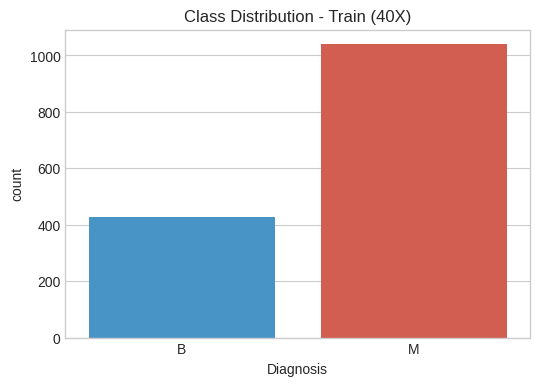

\n### 2.2.2 Univariate Feature Distributions (40X) ###


/tmp/ipykernel_541445/1111749914.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train_features, x='Diagnosis', y=col, palette=['#3498db', '#e74c3c'])


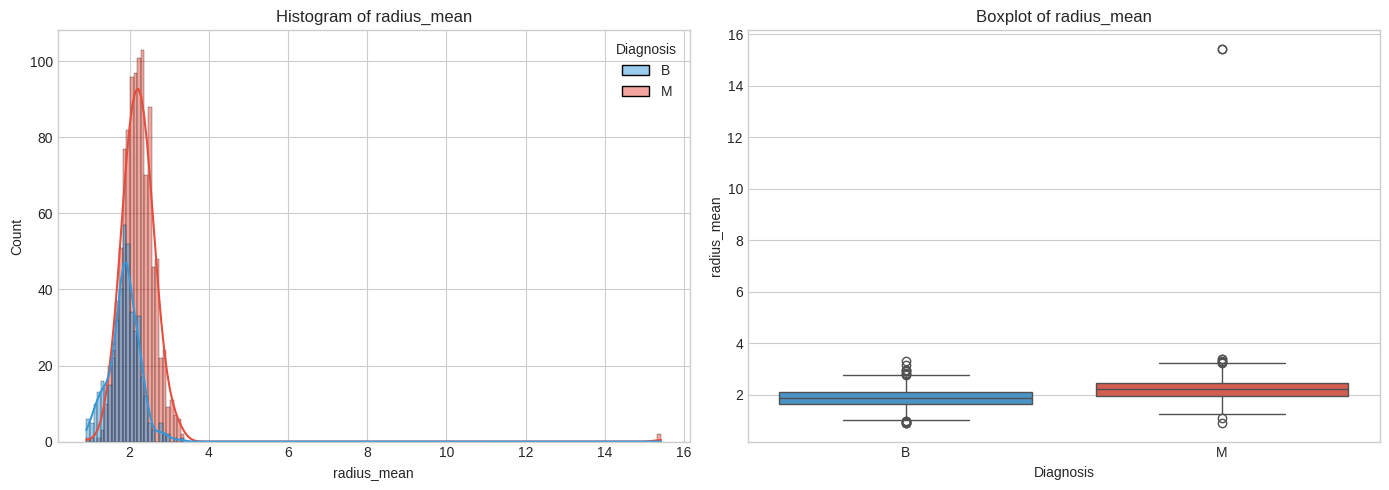

/tmp/ipykernel_541445/1111749914.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train_features, x='Diagnosis', y=col, palette=['#3498db', '#e74c3c'])


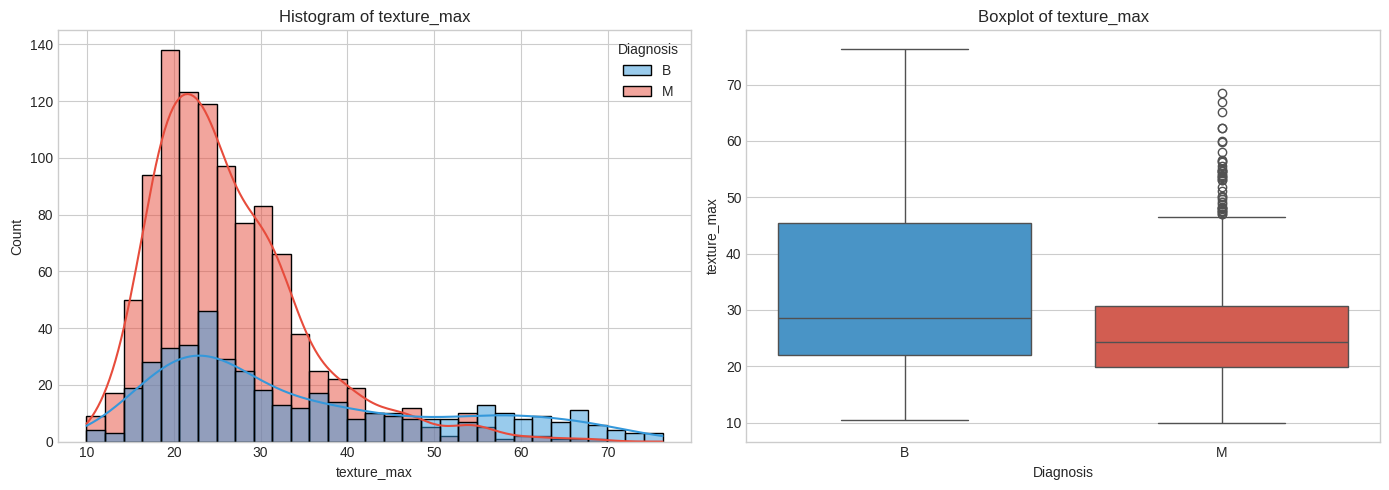

/tmp/ipykernel_541445/1111749914.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train_features, x='Diagnosis', y=col, palette=['#3498db', '#e74c3c'])


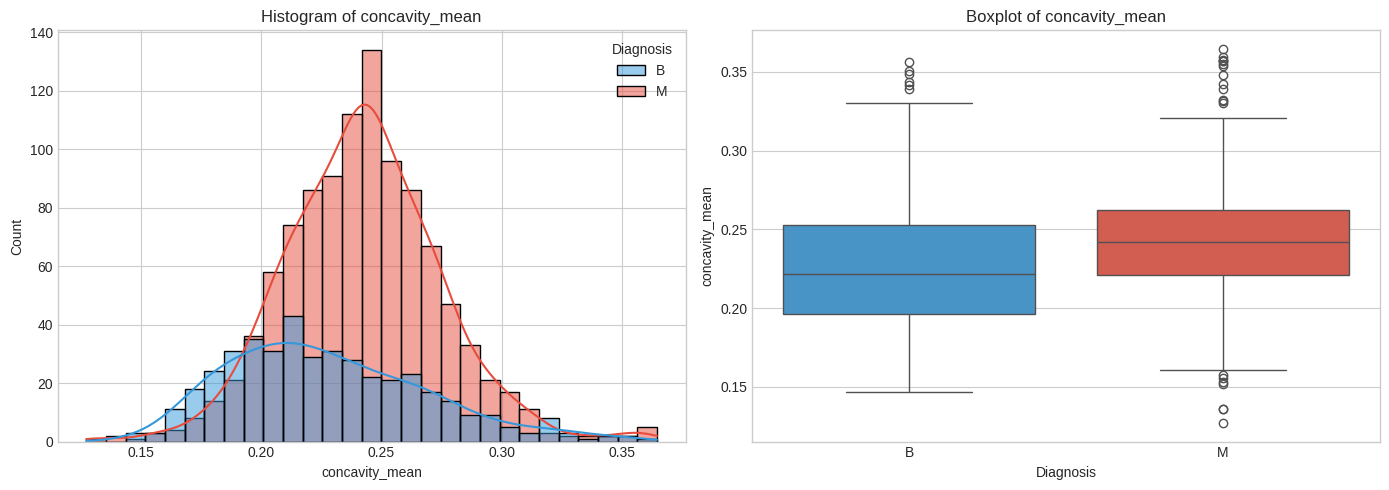

/tmp/ipykernel_541445/1111749914.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train_features, x='Diagnosis', y=col, palette=['#3498db', '#e74c3c'])


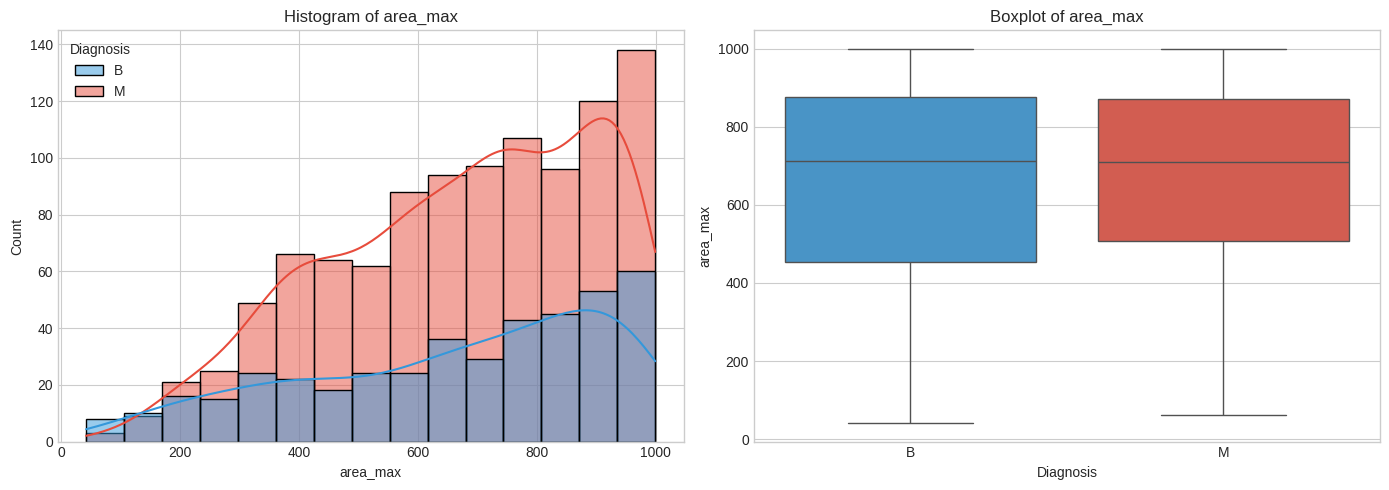

/tmp/ipykernel_541445/1111749914.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train_features, x='Diagnosis', y=col, palette=['#3498db', '#e74c3c'])


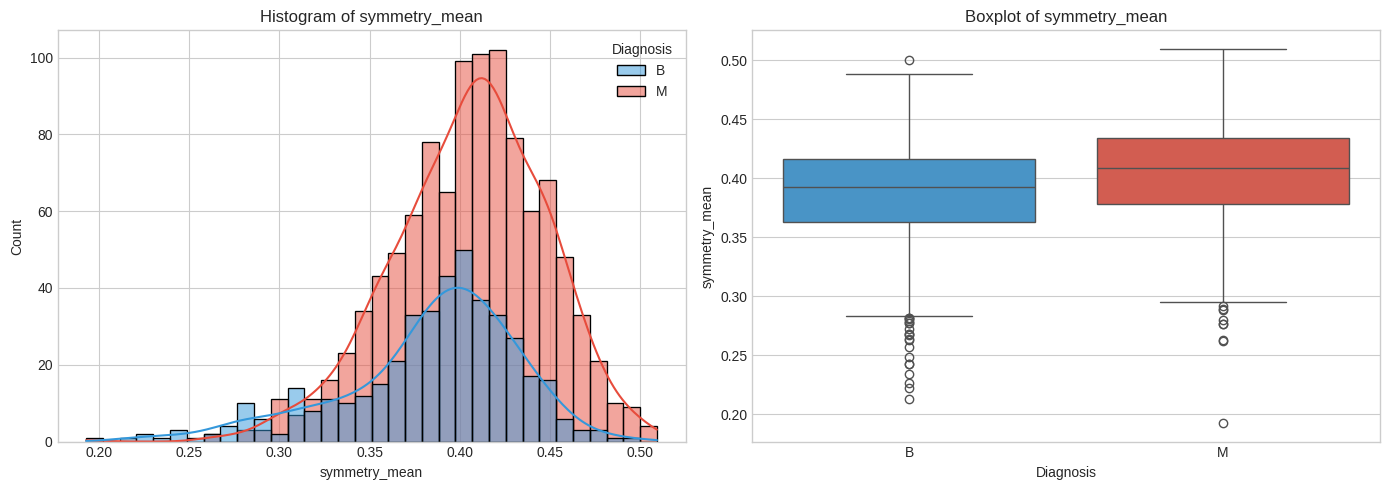

/tmp/ipykernel_541445/1111749914.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train_features, x='Diagnosis', y=col, palette=['#3498db', '#e74c3c'])


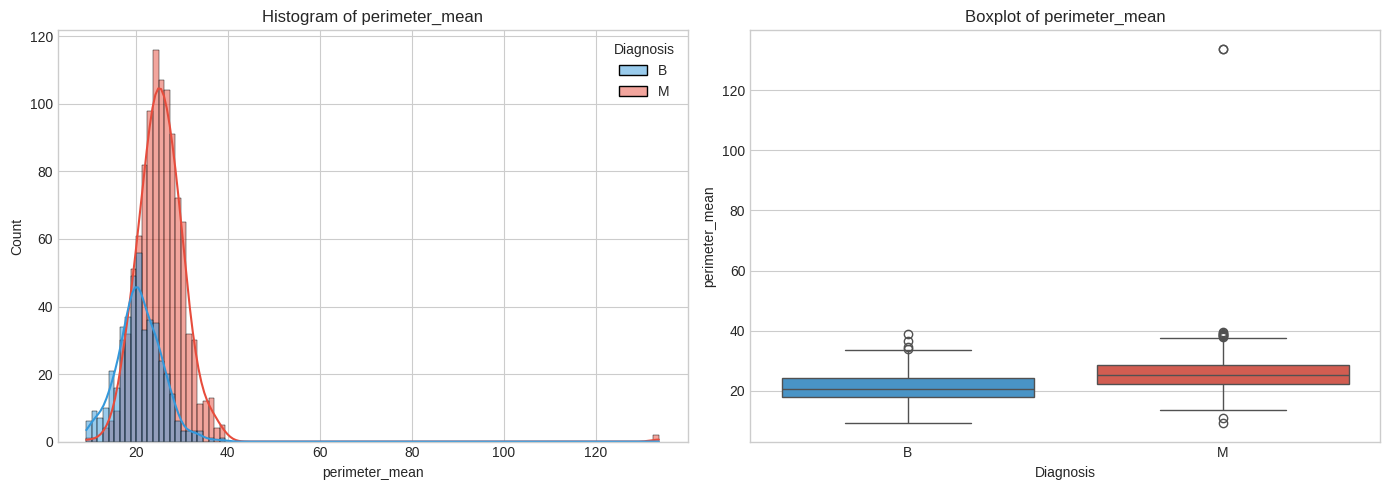

\n### 2.2.3 Feature Correlation Analysis (40X) ###
Correlation heatmap saved to: /home/sih/Documents/GI/l4_s2/decisional_informatics/projects/breast-cancer/reports/figures/40X/feature_correlation_heatmap_40X.png


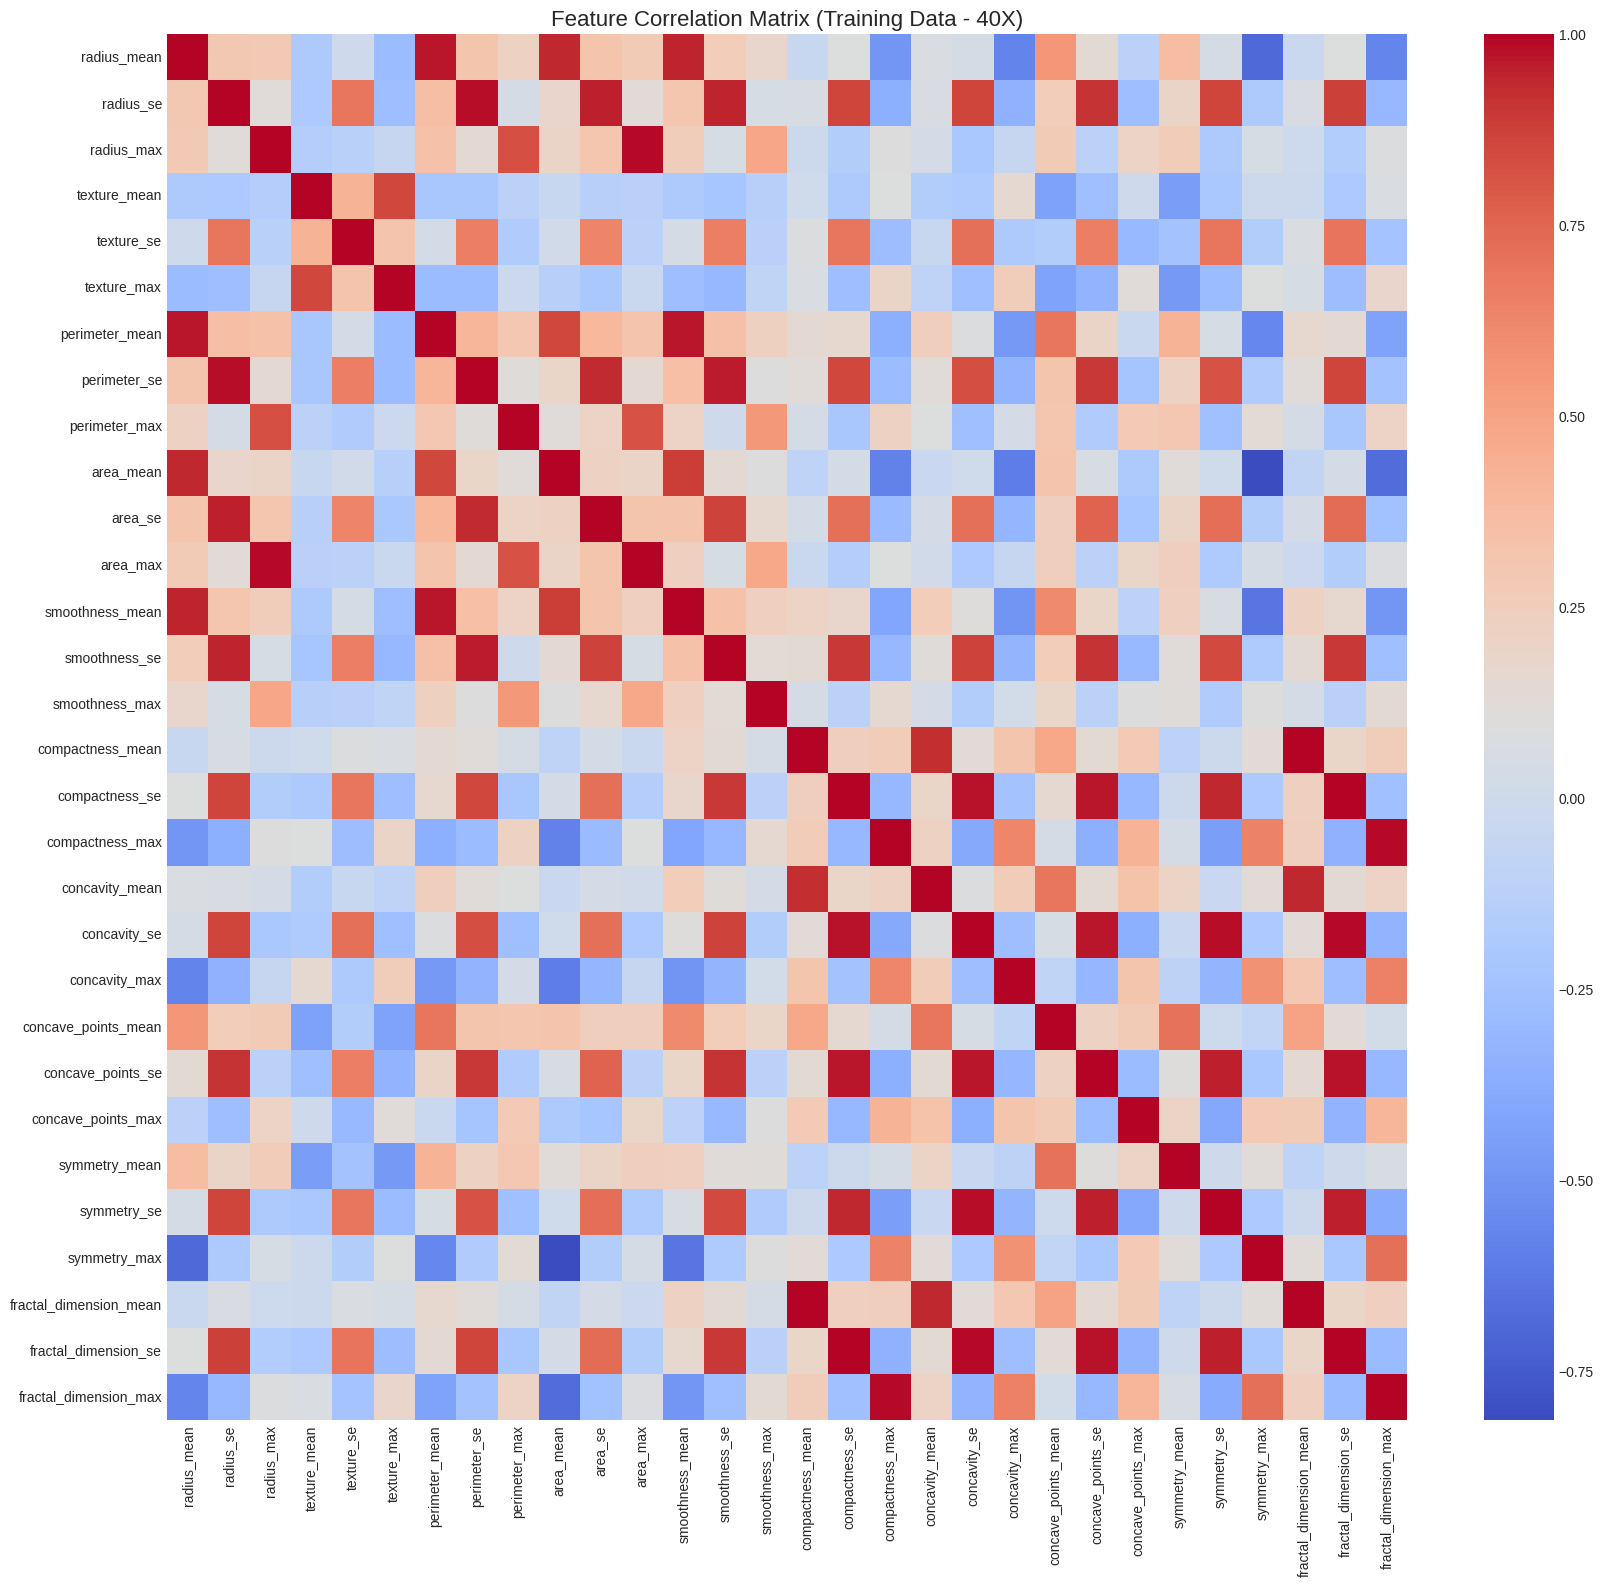

\nHighly Correlated Feature Pairs (abs(correlation) > 0.90):
- fractal_dimension_mean and compactness_mean: 0.998
- fractal_dimension_se and compactness_se: 0.997
- area_max and radius_max: 0.992
- fractal_dimension_max and compactness_max: 0.990
- fractal_dimension_se and concavity_se: 0.988
- symmetry_se and concavity_se: 0.981
- perimeter_se and radius_se: 0.980
- concavity_se and compactness_se: 0.977
- fractal_dimension_se and concave_points_se: 0.976
- concave_points_se and compactness_se: 0.968
- concave_points_se and concavity_se: 0.968
- smoothness_mean and perimeter_mean: 0.965
- perimeter_mean and radius_mean: 0.965
- smoothness_se and perimeter_se: 0.961
- fractal_dimension_se and symmetry_se: 0.957
- area_se and radius_se: 0.952
- symmetry_se and concave_points_se: 0.952
- smoothness_mean and radius_mean: 0.948
- smoothness_se and radius_se: 0.947
- area_mean and radius_mean: 0.943
- fractal_dimension_mean and concavity_mean: 0.942
- symmetry_se and compactness_se: 0.937
-

/home/sih/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:59:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/sih/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:59:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/sih/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:59:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/sih/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:59:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/sih/miniconda3/lib/python3.12/site-packages/xgboost/tr

  Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}
  Best XGBoost CV Score: 0.9002
XGBoost trained and saved.

--- 2.5 Evaluating Models for 40X ---
2025-06-27 17:00:07.574 | INFO     | __main__:evaluate_model:18 - --- Eval: SVC (40X) ---
Accuracy: 0.6238

              precision    recall  f1-score   support

           B       0.50      0.36      0.42       198
           M       0.67      0.78      0.72       331

    accuracy                           0.62       529
   macro avg       0.58      0.57      0.57       529
weighted avg       0.61      0.62      0.61       529


ROC AUC: 0.6117
2025-06-27 17:00:08.711 | INFO     | __main__:evaluate_model:18 - --- Eval: RandomForest (40X) ---
Accuracy: 0.6427

              precision    recall  f1-score   support

           B       0.58      0.16      0.25       198
           M       0.65      0.93      0.77       331

    accuracy                           0.64       529
   macro avg  

/tmp/ipykernel_541445/1111749914.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=df_train_features, palette=['#3498db', '#e74c3c'])


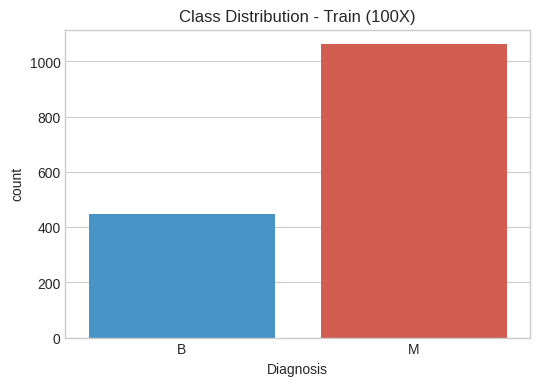

\n### 2.2.2 Univariate Feature Distributions (100X) ###


/tmp/ipykernel_541445/1111749914.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train_features, x='Diagnosis', y=col, palette=['#3498db', '#e74c3c'])


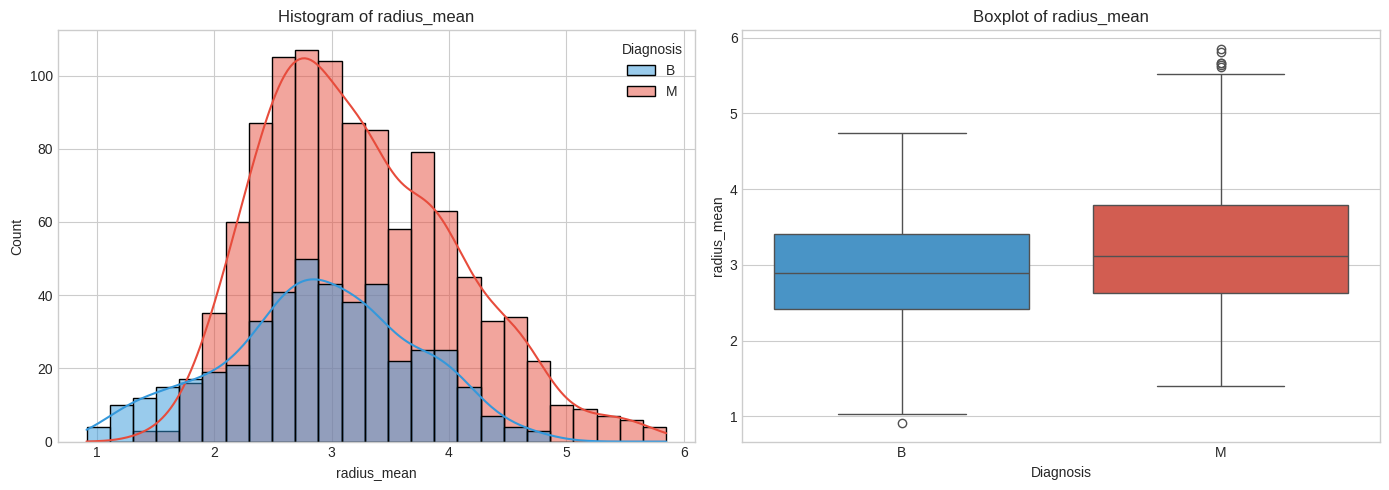

/tmp/ipykernel_541445/1111749914.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train_features, x='Diagnosis', y=col, palette=['#3498db', '#e74c3c'])


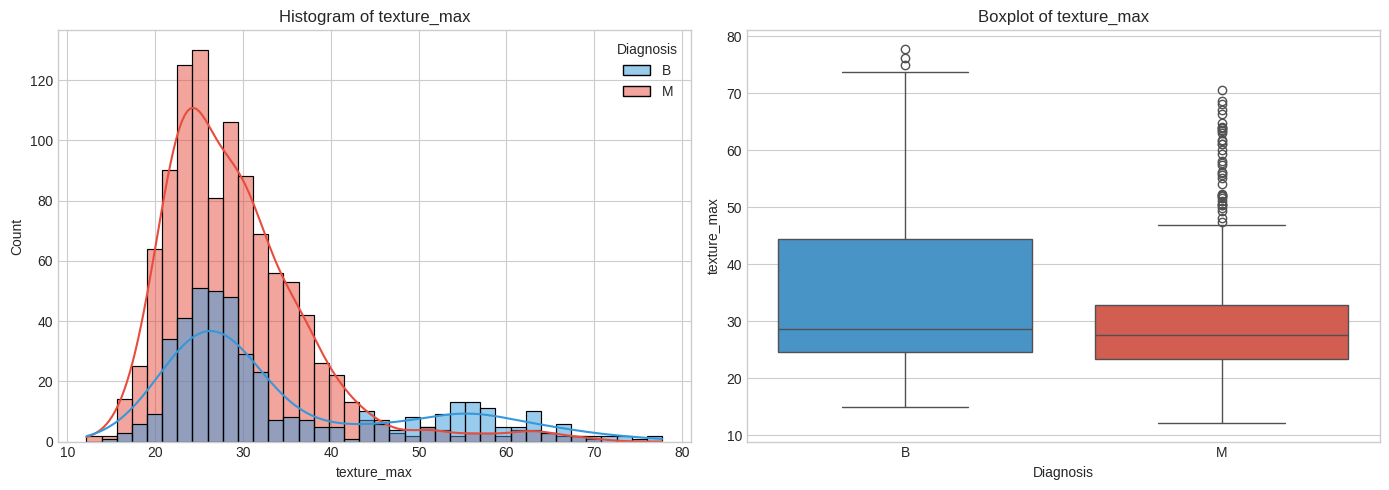

/tmp/ipykernel_541445/1111749914.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train_features, x='Diagnosis', y=col, palette=['#3498db', '#e74c3c'])


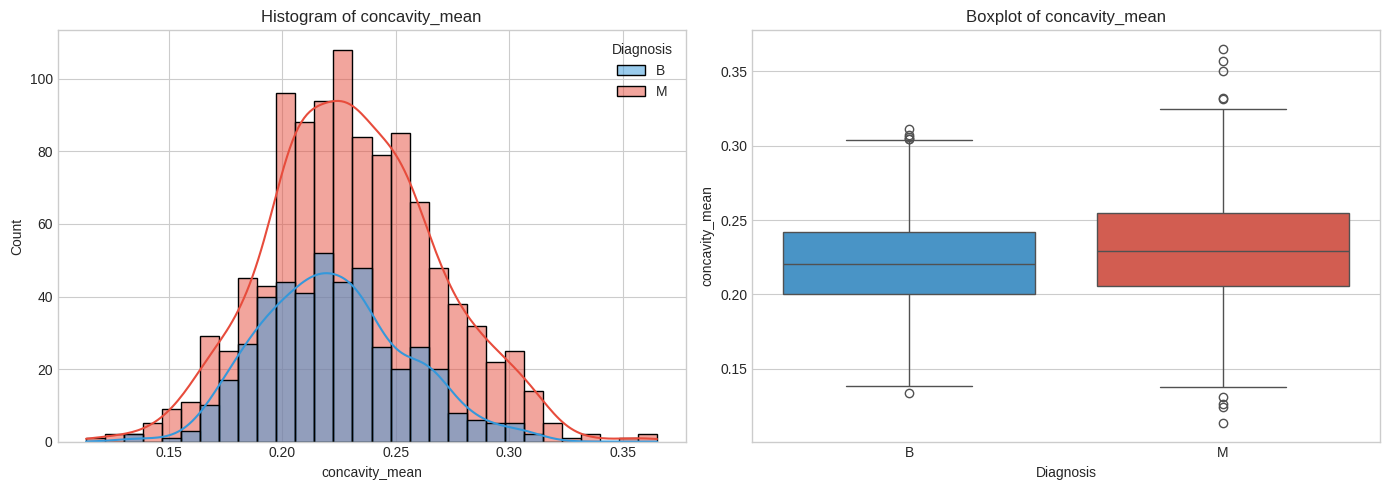

/tmp/ipykernel_541445/1111749914.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train_features, x='Diagnosis', y=col, palette=['#3498db', '#e74c3c'])


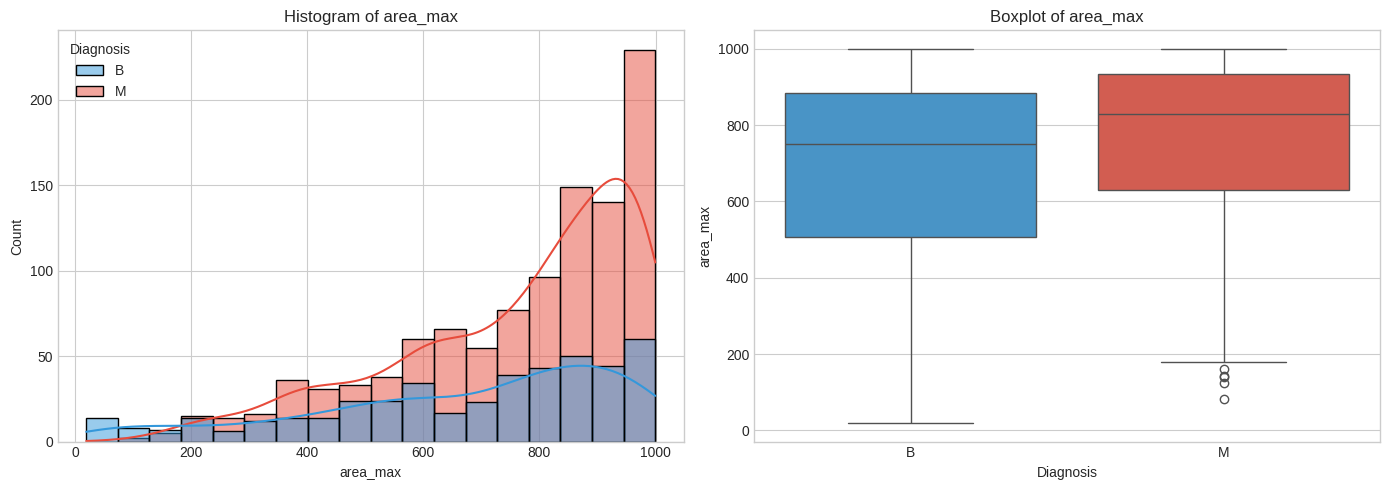

/tmp/ipykernel_541445/1111749914.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train_features, x='Diagnosis', y=col, palette=['#3498db', '#e74c3c'])


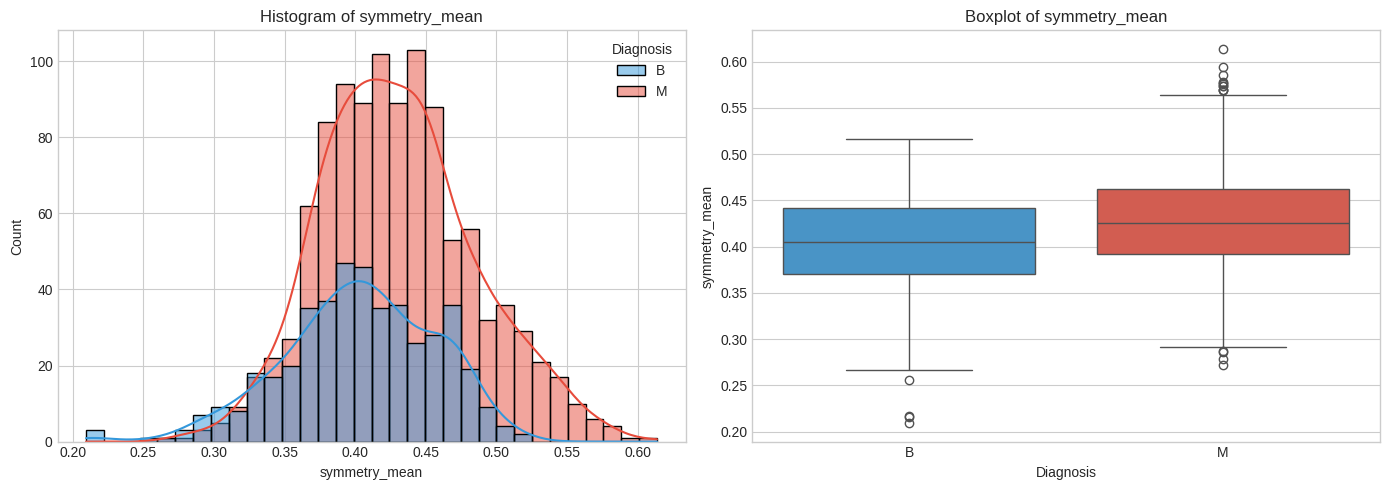

/tmp/ipykernel_541445/1111749914.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train_features, x='Diagnosis', y=col, palette=['#3498db', '#e74c3c'])


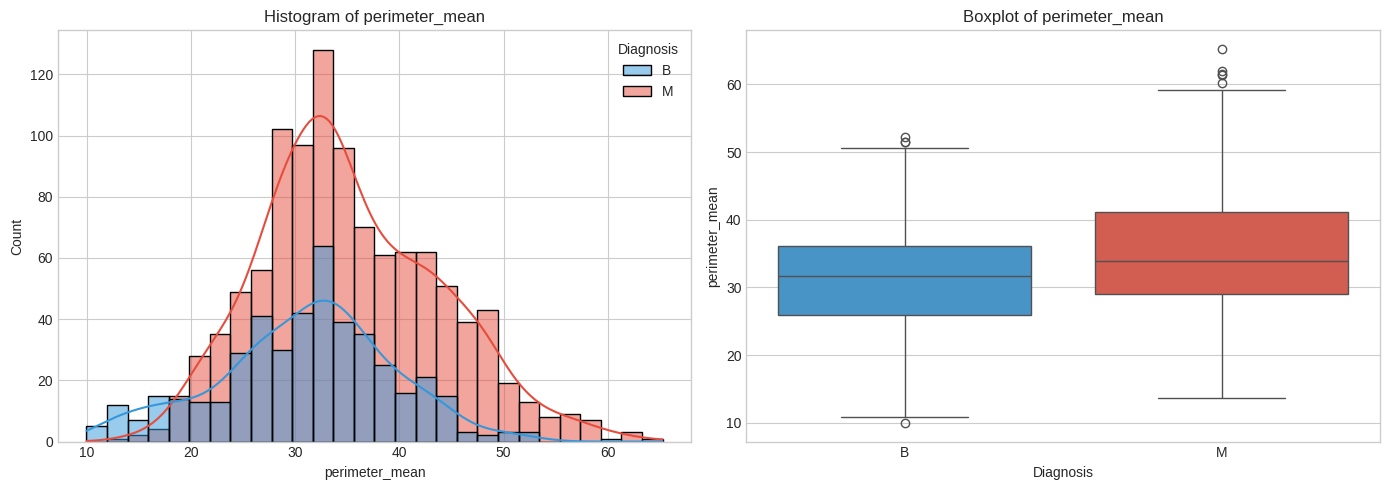

\n### 2.2.3 Feature Correlation Analysis (100X) ###
Correlation heatmap saved to: /home/sih/Documents/GI/l4_s2/decisional_informatics/projects/breast-cancer/reports/figures/100X/feature_correlation_heatmap_100X.png


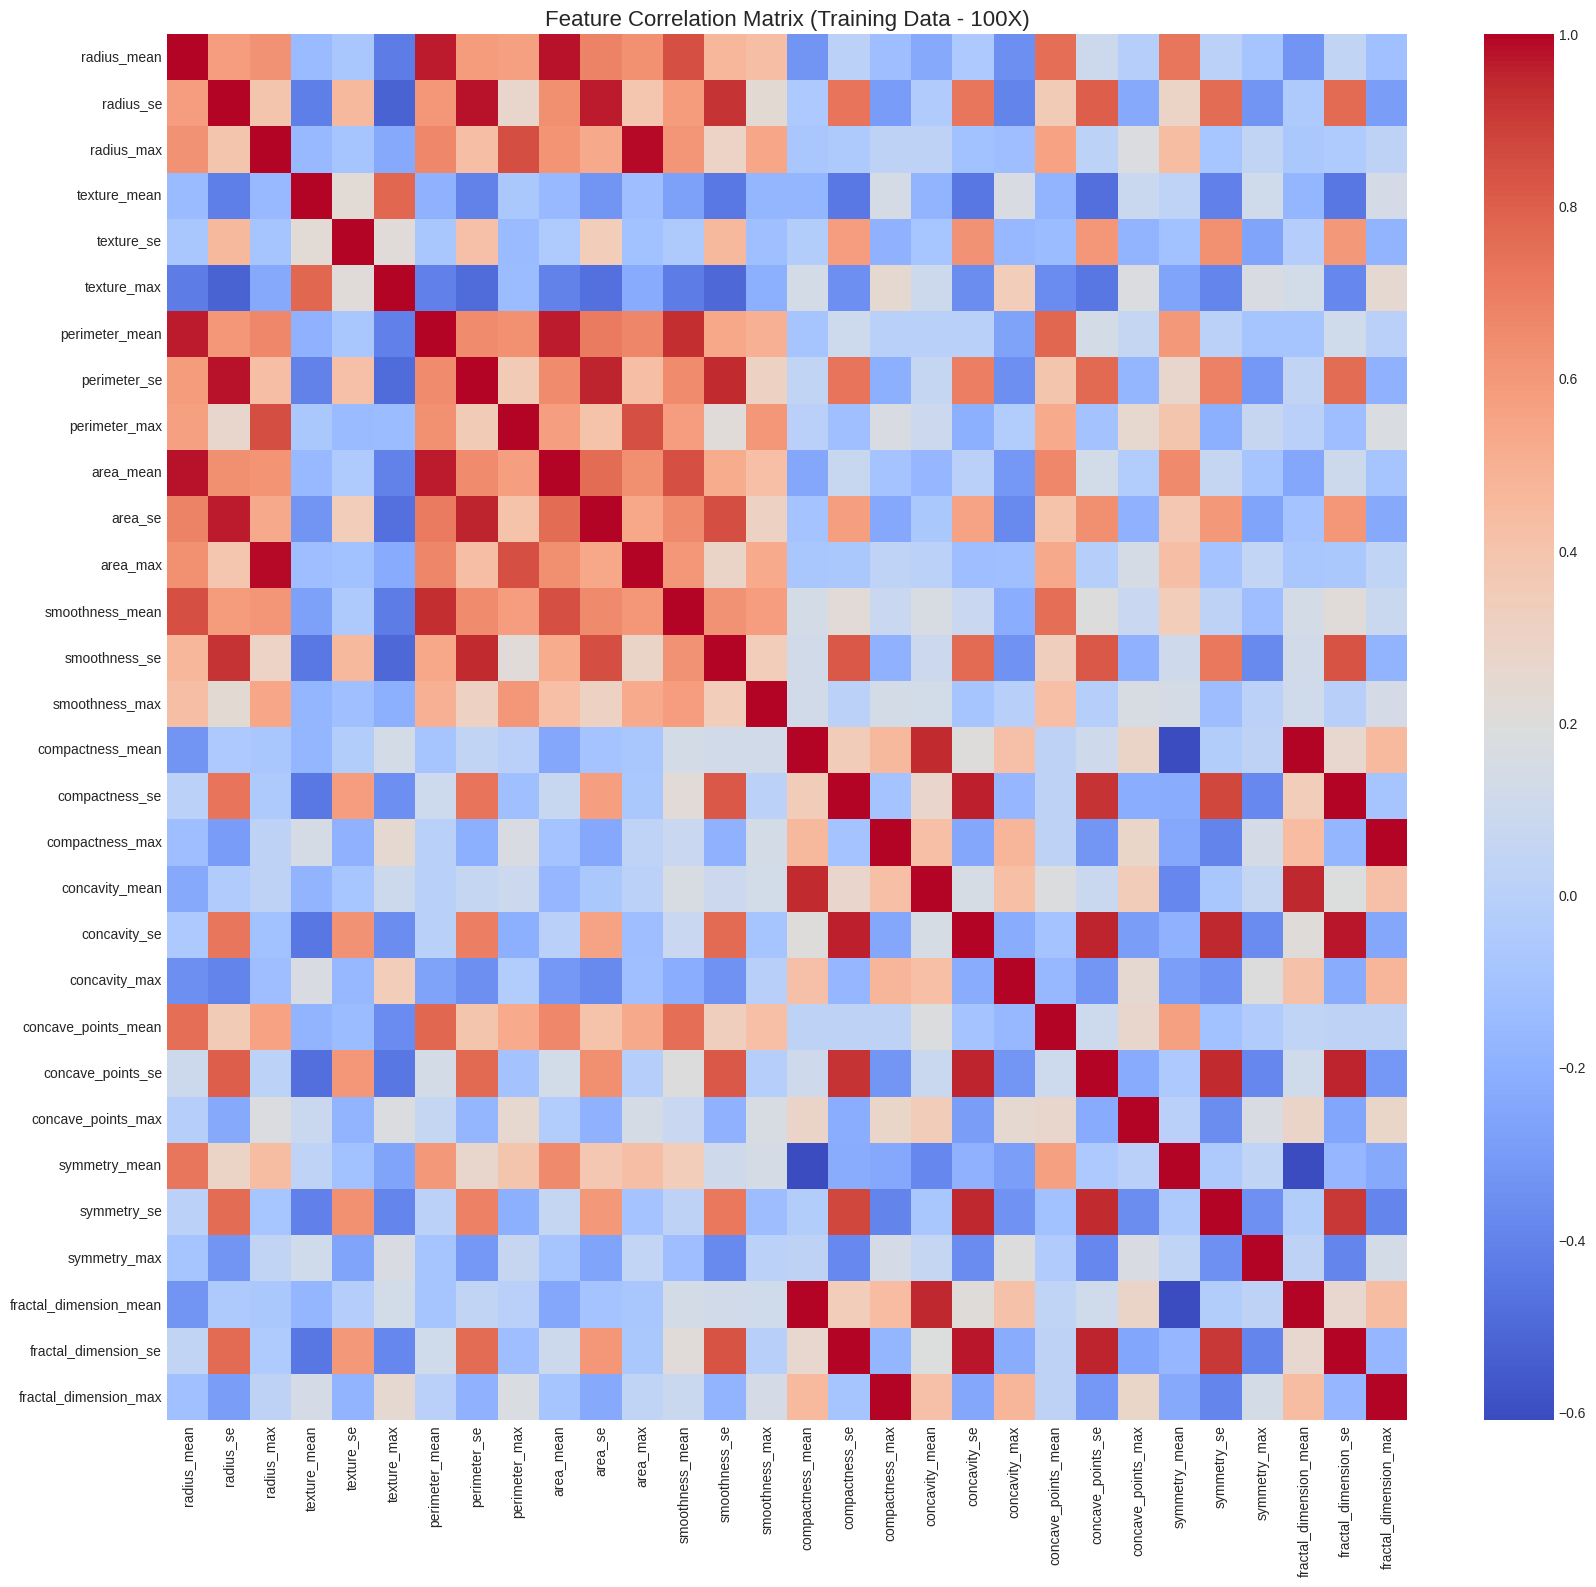

\nHighly Correlated Feature Pairs (abs(correlation) > 0.90):
- fractal_dimension_max and compactness_max: 0.999
- fractal_dimension_mean and compactness_mean: 0.998
- fractal_dimension_se and compactness_se: 0.994
- area_max and radius_max: 0.988
- perimeter_se and radius_se: 0.977
- area_mean and radius_mean: 0.976
- fractal_dimension_se and concavity_se: 0.975
- area_mean and perimeter_mean: 0.967
- area_se and radius_se: 0.963
- perimeter_mean and radius_mean: 0.963
- concavity_se and compactness_se: 0.959
- concave_points_se and concavity_se: 0.955
- area_se and perimeter_se: 0.953
- fractal_dimension_se and concave_points_se: 0.950
- symmetry_se and concavity_se: 0.949
- fractal_dimension_mean and concavity_mean: 0.948
- smoothness_se and perimeter_se: 0.942
- concavity_mean and compactness_mean: 0.942
- symmetry_se and concave_points_se: 0.940
- smoothness_mean and perimeter_mean: 0.934
- smoothness_se and radius_se: 0.925
- concave_points_se and compactness_se: 0.924
- fractal_d

/home/sih/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:03:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/sih/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:03:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/sih/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:03:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/sih/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:03:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/sih/miniconda3/lib/python3.12/site-packages/xgboost/tr

  Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
  Best XGBoost CV Score: 0.8786
XGBoost trained and saved.

--- 2.5 Evaluating Models for 100X ---
2025-06-27 17:03:33.610 | INFO     | __main__:evaluate_model:18 - --- Eval: SVC (100X) ---
Accuracy: 0.6399

              precision    recall  f1-score   support

           B       0.47      0.42      0.44       197
           M       0.71      0.76      0.73       375

    accuracy                           0.64       572
   macro avg       0.59      0.59      0.59       572
weighted avg       0.63      0.64      0.63       572


ROC AUC: 0.6215
2025-06-27 17:03:34.265 | INFO     | __main__:evaluate_model:18 - --- Eval: RandomForest (100X) ---
Accuracy: 0.6836

              precision    recall  f1-score   support

           B       0.64      0.19      0.29       197
           M       0.69      0.94      0.80       375

    accuracy                           0.68       572
   macro av

/tmp/ipykernel_541445/1111749914.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=df_train_features, palette=['#3498db', '#e74c3c'])


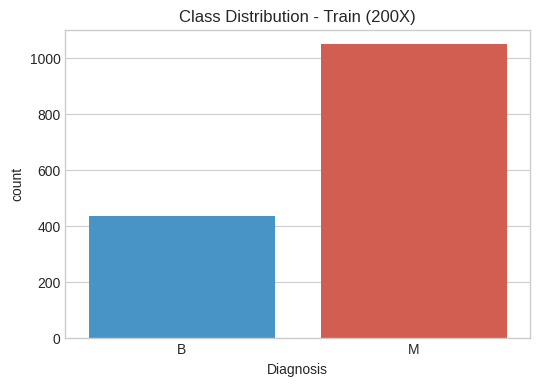

\n### 2.2.2 Univariate Feature Distributions (200X) ###


/tmp/ipykernel_541445/1111749914.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train_features, x='Diagnosis', y=col, palette=['#3498db', '#e74c3c'])


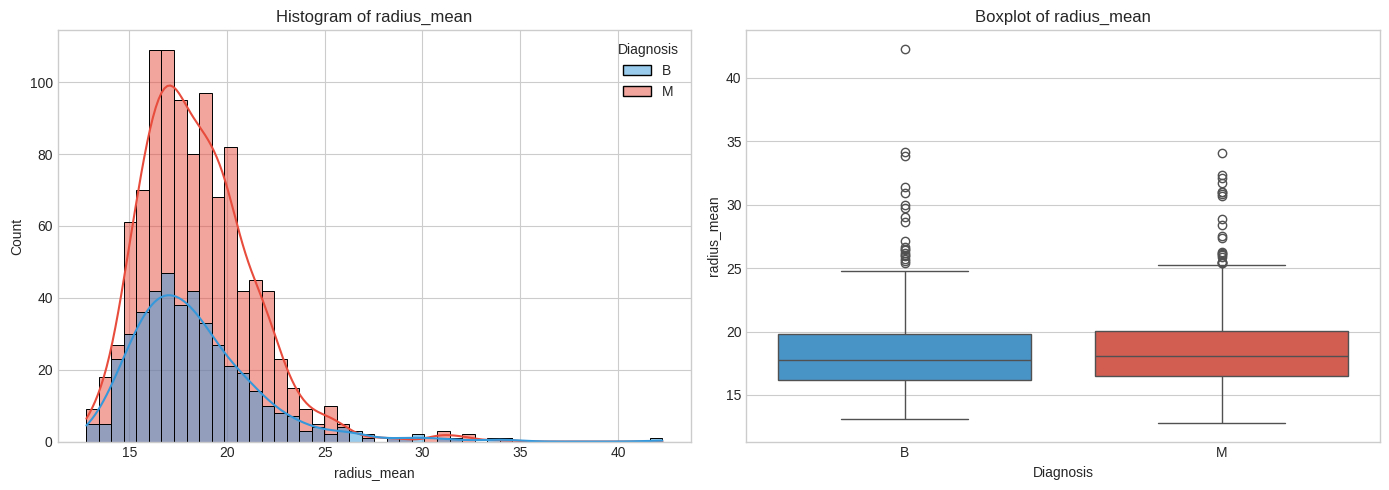

/tmp/ipykernel_541445/1111749914.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train_features, x='Diagnosis', y=col, palette=['#3498db', '#e74c3c'])


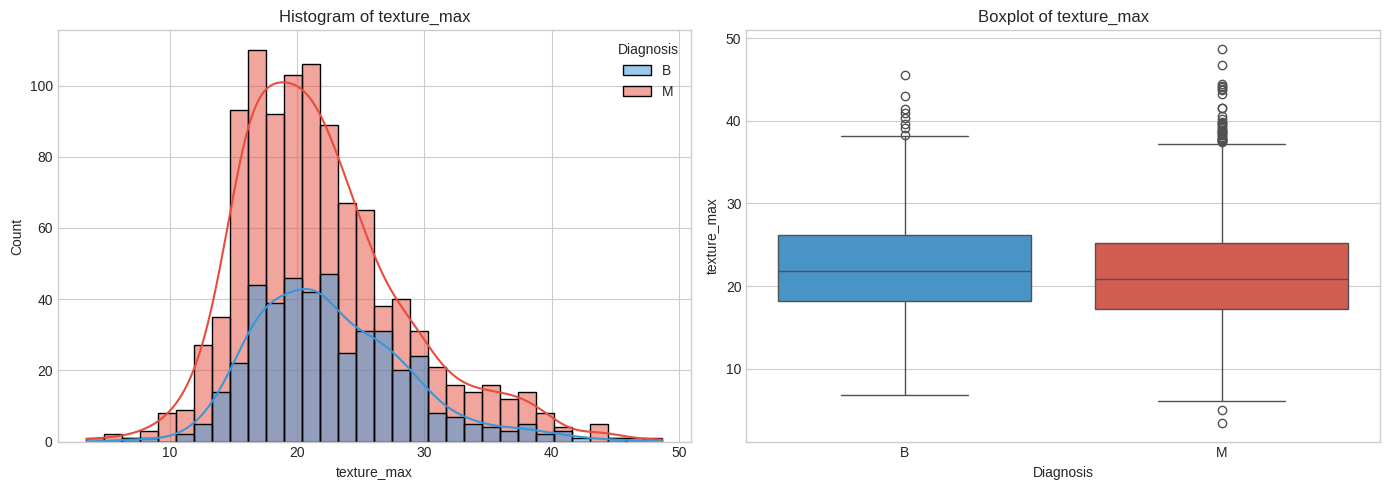

/tmp/ipykernel_541445/1111749914.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train_features, x='Diagnosis', y=col, palette=['#3498db', '#e74c3c'])


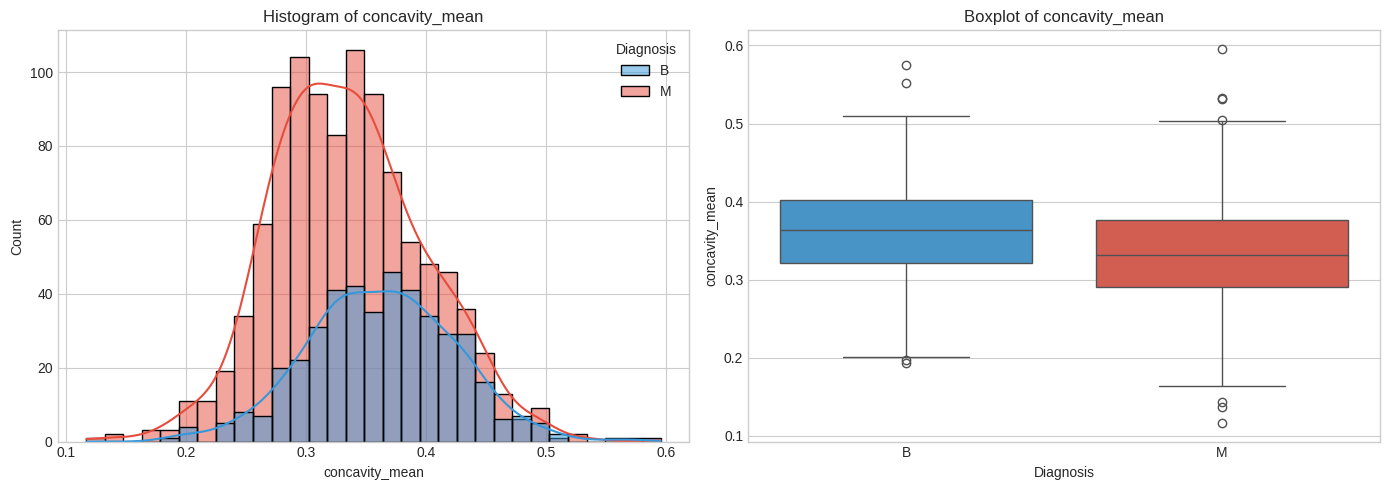

/tmp/ipykernel_541445/1111749914.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train_features, x='Diagnosis', y=col, palette=['#3498db', '#e74c3c'])


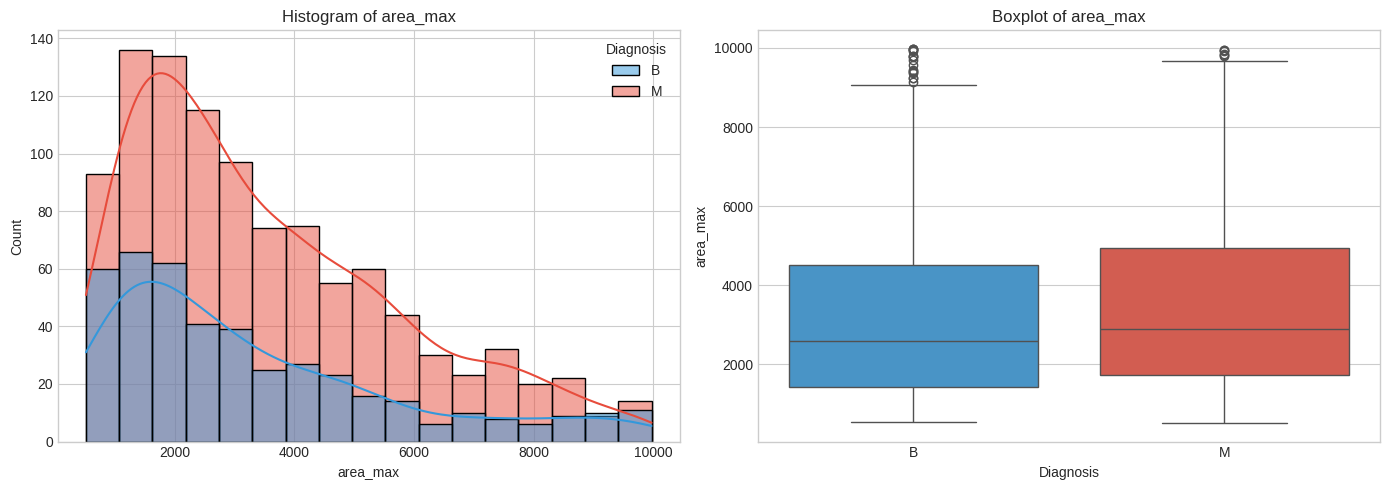

/tmp/ipykernel_541445/1111749914.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train_features, x='Diagnosis', y=col, palette=['#3498db', '#e74c3c'])


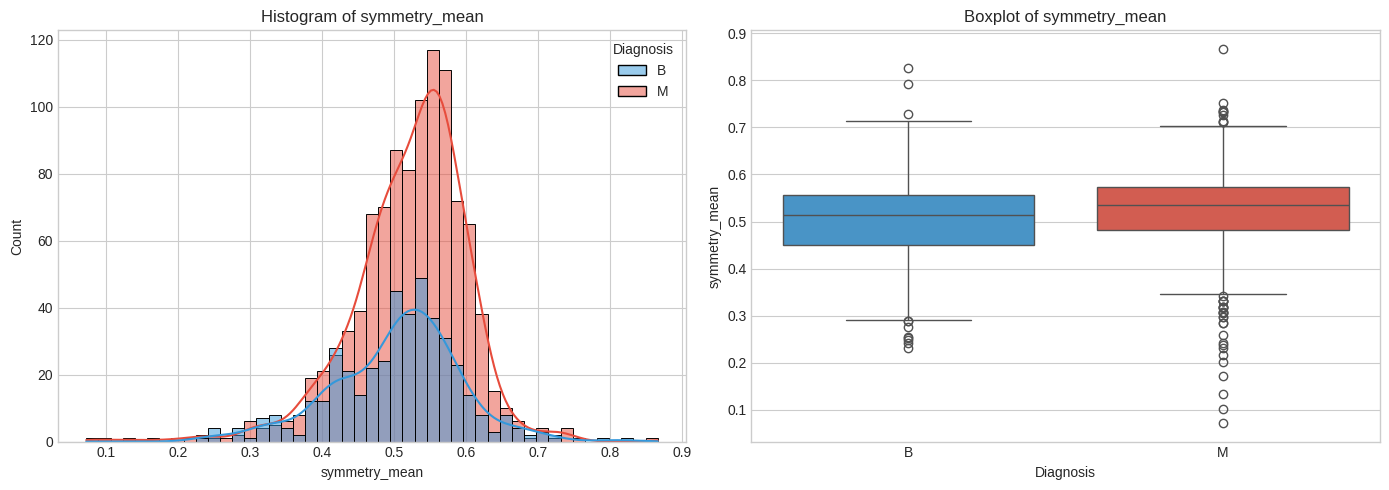

/tmp/ipykernel_541445/1111749914.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train_features, x='Diagnosis', y=col, palette=['#3498db', '#e74c3c'])


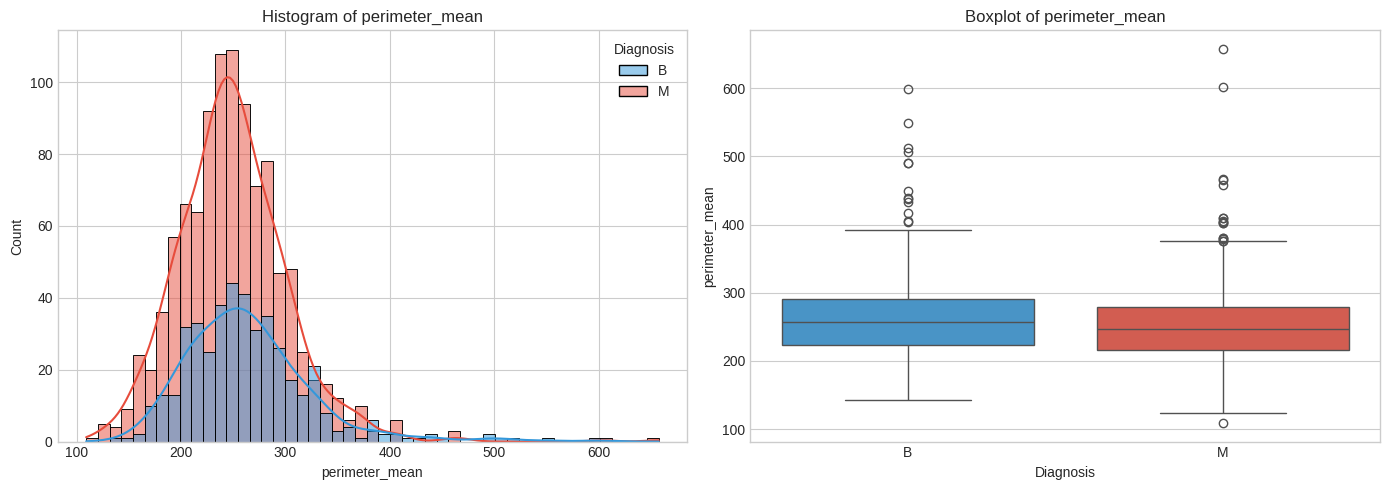

\n### 2.2.3 Feature Correlation Analysis (200X) ###
Correlation heatmap saved to: /home/sih/Documents/GI/l4_s2/decisional_informatics/projects/breast-cancer/reports/figures/200X/feature_correlation_heatmap_200X.png


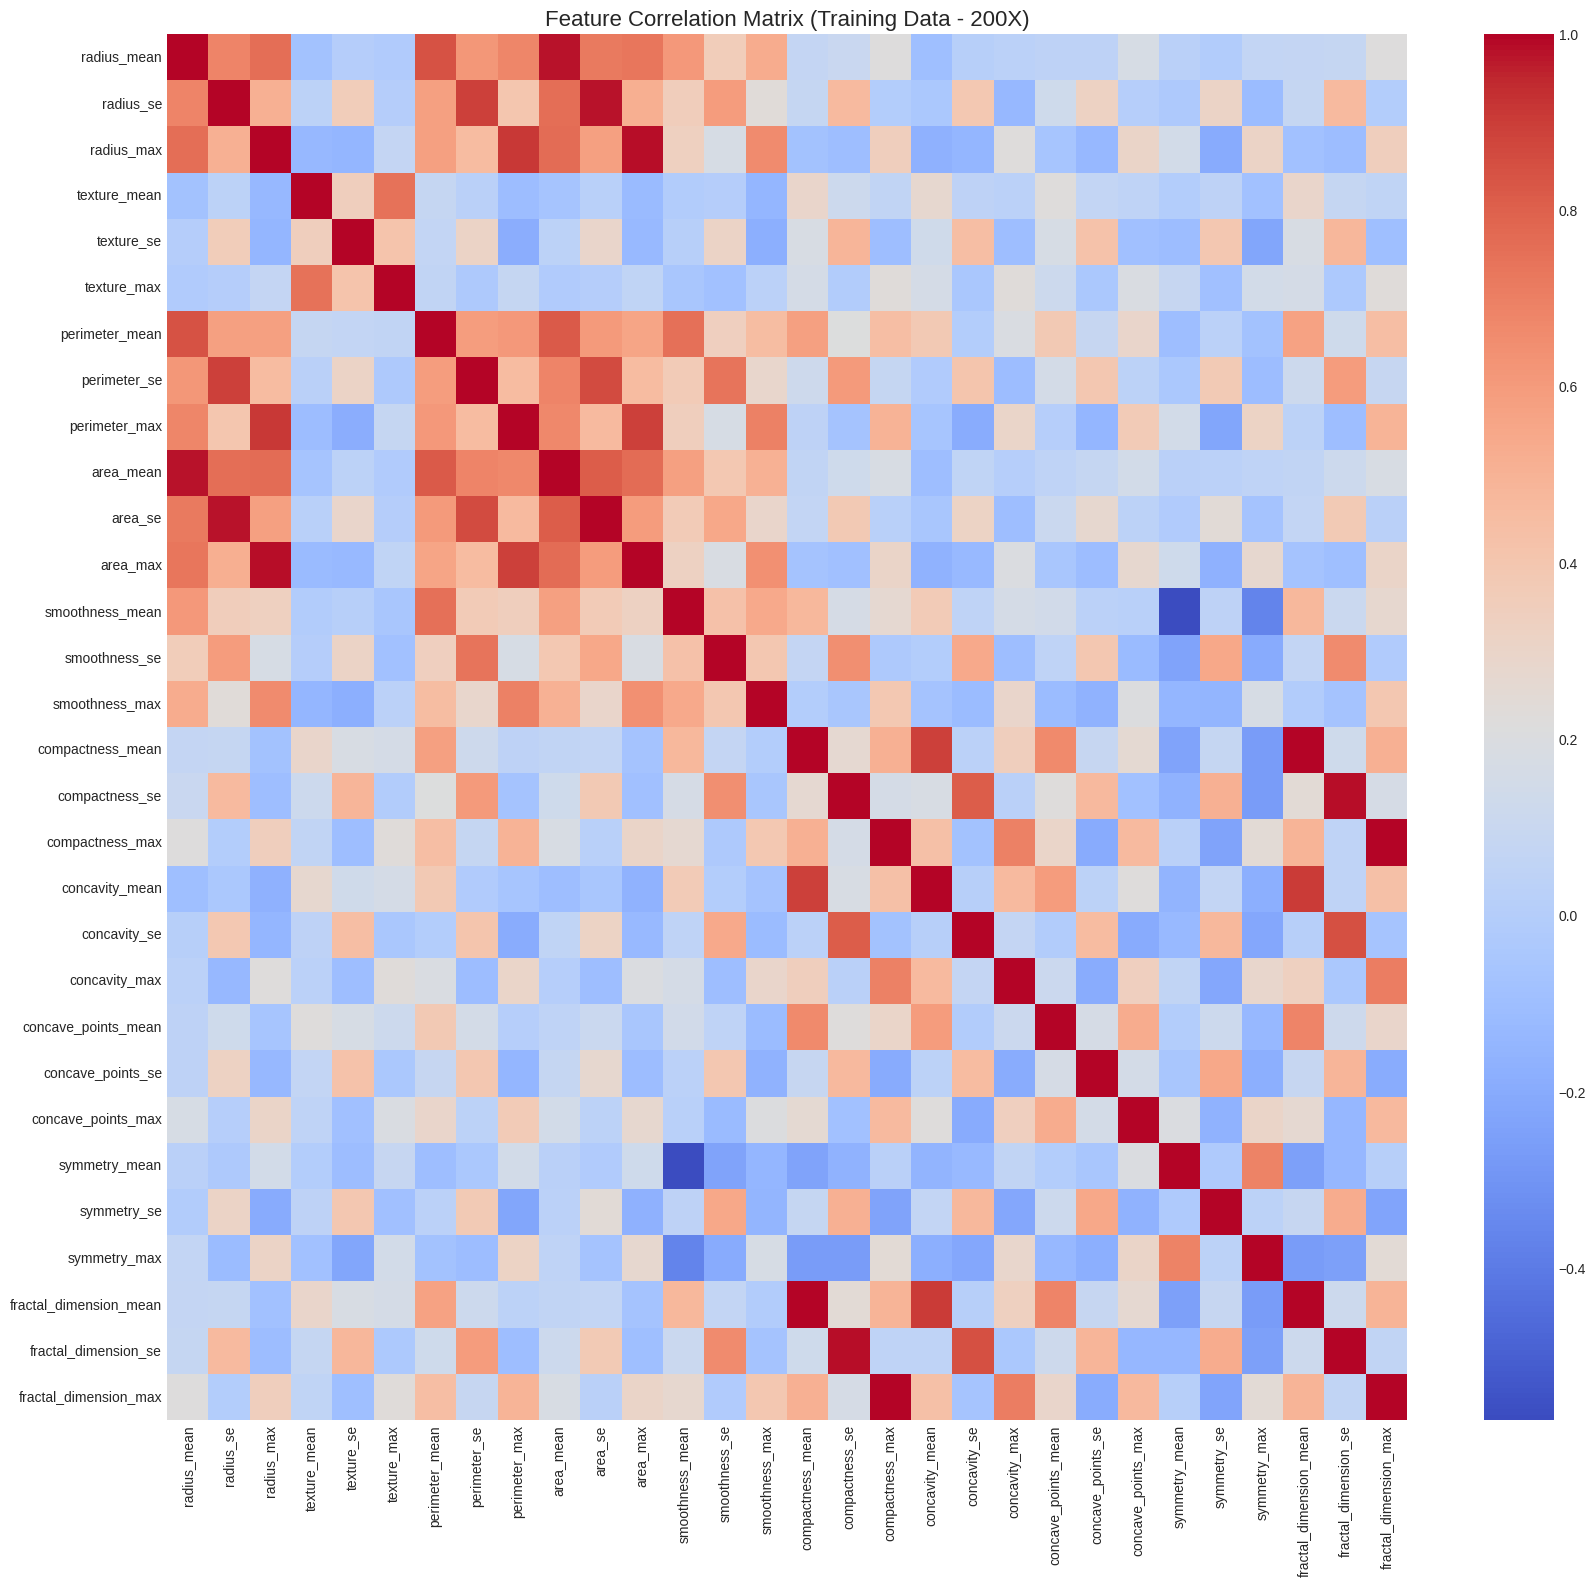

\nHighly Correlated Feature Pairs (abs(correlation) > 0.90):
- fractal_dimension_max and compactness_max: 0.996
- fractal_dimension_mean and compactness_mean: 0.996
- area_max and radius_max: 0.986
- fractal_dimension_se and compactness_se: 0.982
- area_mean and radius_mean: 0.979
- area_se and radius_se: 0.978
- perimeter_max and radius_max: 0.914
- fractal_dimension_mean and concavity_mean: 0.906

--- 2.3 Preprocessing Data for 200X ---
Training rows after NaN handling: 1487
Training data preprocessed.
Test rows after NaN handling: 526
Test data preprocessed.

--- 2.4 Training Models for 200X ---
Training SVC...
  Best SVC Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
  Best SVC CV Score: 0.7296
SVC trained and saved.
Training RandomForest...
  Best RandomForest Params: {'class_weight': 'balanced_subsample', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
  Best RandomForest CV Score: 0.7438
RandomForest trained and saved.
Training LogisticRegression...
  Best 

/home/sih/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:06:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/sih/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:06:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/sih/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:06:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/sih/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:06:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/sih/miniconda3/lib/python3.12/site-packages/xgboost/tr

  Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}
  Best XGBoost CV Score: 0.7454
XGBoost trained and saved.

--- 2.5 Evaluating Models for 200X ---
2025-06-27 17:06:58.796 | INFO     | __main__:evaluate_model:18 - --- Eval: SVC (200X) ---
Accuracy: 0.5798

              precision    recall  f1-score   support

           B       0.42      0.46      0.44       186
           M       0.69      0.64      0.66       340

    accuracy                           0.58       526
   macro avg       0.55      0.55      0.55       526
weighted avg       0.59      0.58      0.58       526


ROC AUC: 0.5714
2025-06-27 17:06:59.389 | INFO     | __main__:evaluate_model:18 - --- Eval: RandomForest (200X) ---
Accuracy: 0.6331

              precision    recall  f1-score   support

           B       0.44      0.15      0.22       186
           M       0.66      0.90      0.76       340

    accuracy                           0.63       526
   macro av

/tmp/ipykernel_541445/1111749914.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=df_train_features, palette=['#3498db', '#e74c3c'])


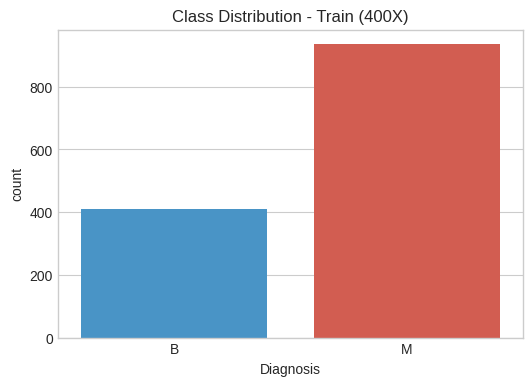

\n### 2.2.2 Univariate Feature Distributions (400X) ###


/tmp/ipykernel_541445/1111749914.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train_features, x='Diagnosis', y=col, palette=['#3498db', '#e74c3c'])


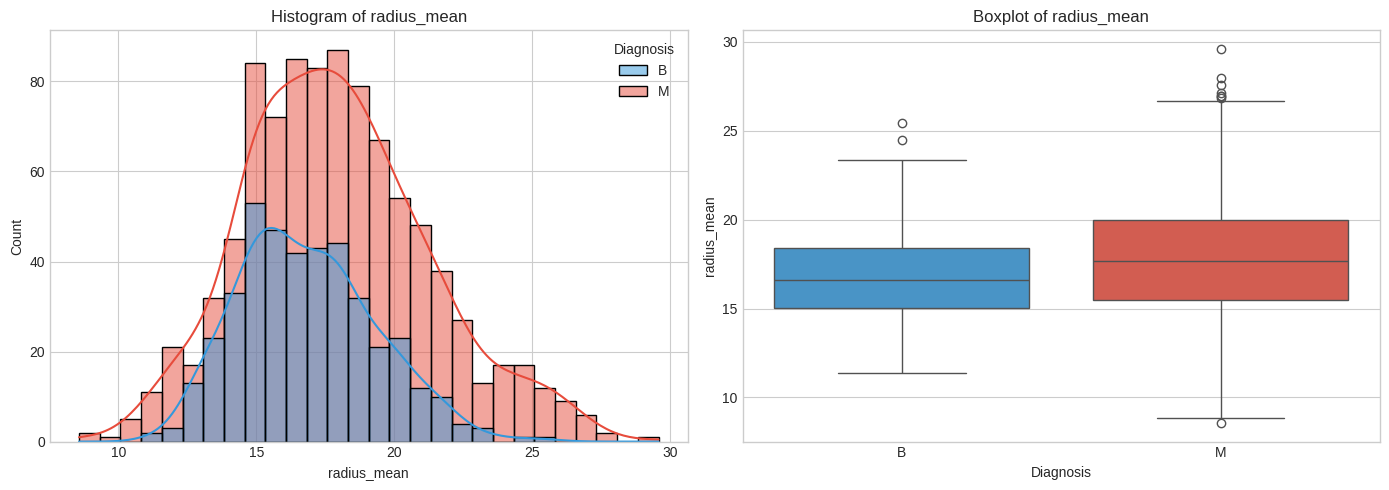

/tmp/ipykernel_541445/1111749914.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train_features, x='Diagnosis', y=col, palette=['#3498db', '#e74c3c'])


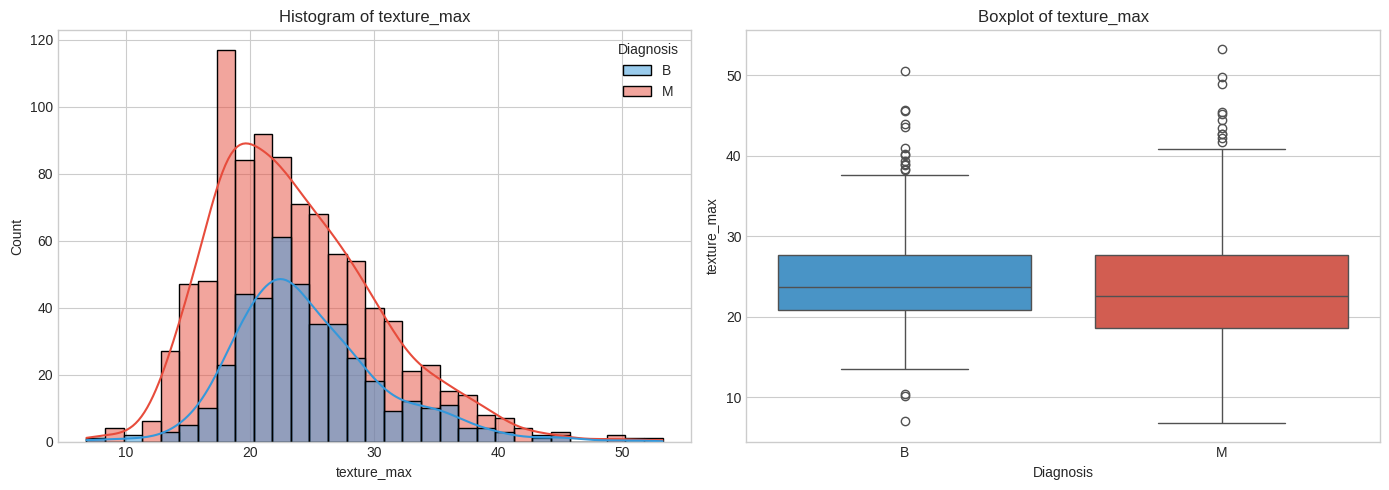

/tmp/ipykernel_541445/1111749914.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train_features, x='Diagnosis', y=col, palette=['#3498db', '#e74c3c'])


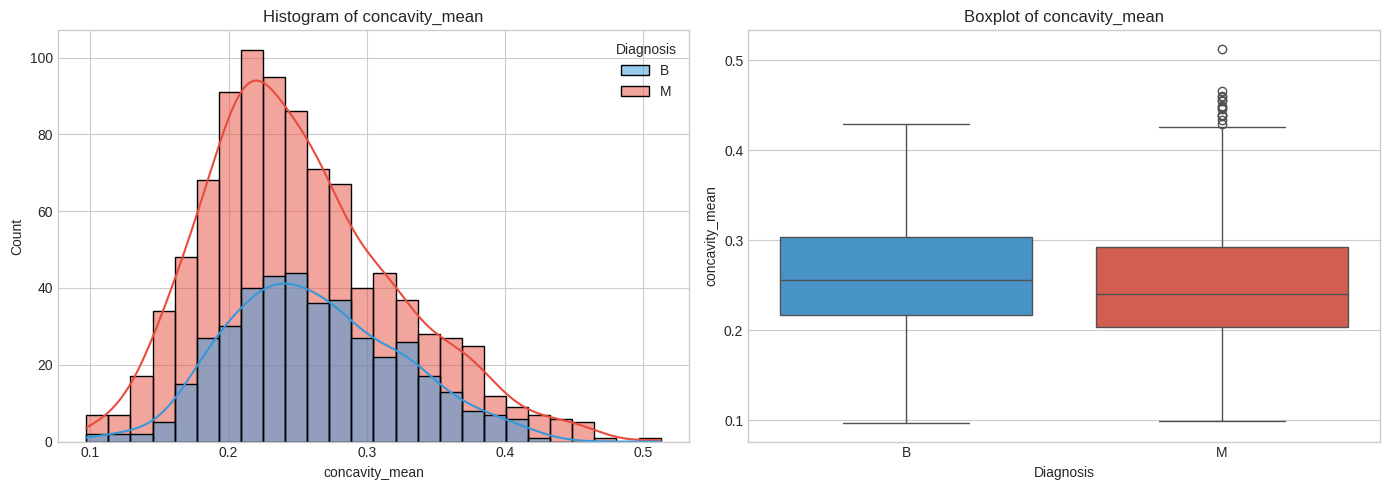

/tmp/ipykernel_541445/1111749914.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train_features, x='Diagnosis', y=col, palette=['#3498db', '#e74c3c'])


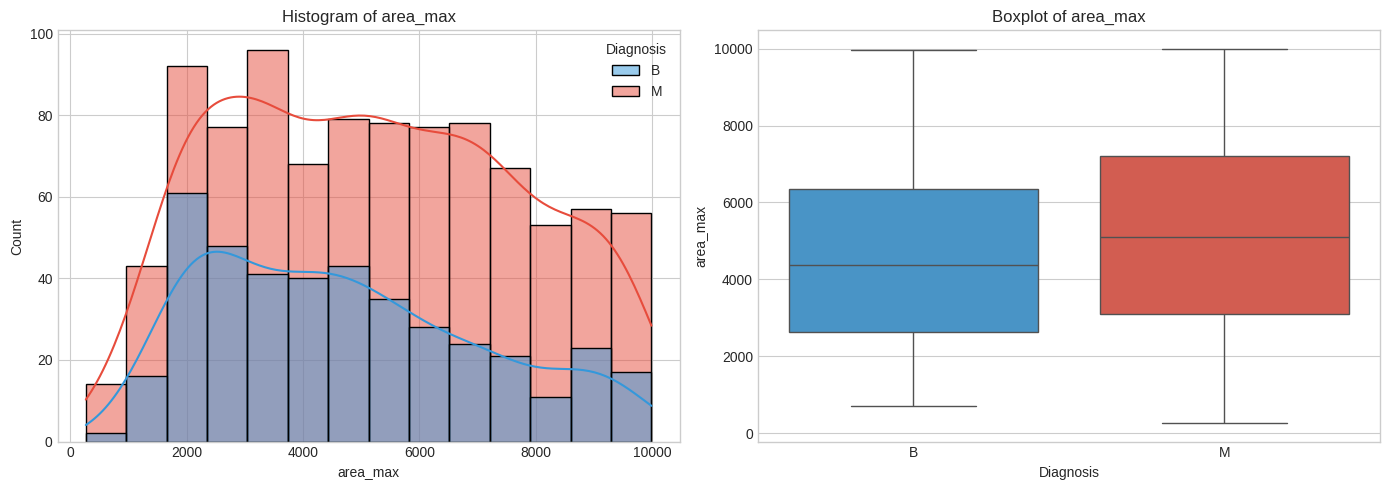

/tmp/ipykernel_541445/1111749914.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train_features, x='Diagnosis', y=col, palette=['#3498db', '#e74c3c'])


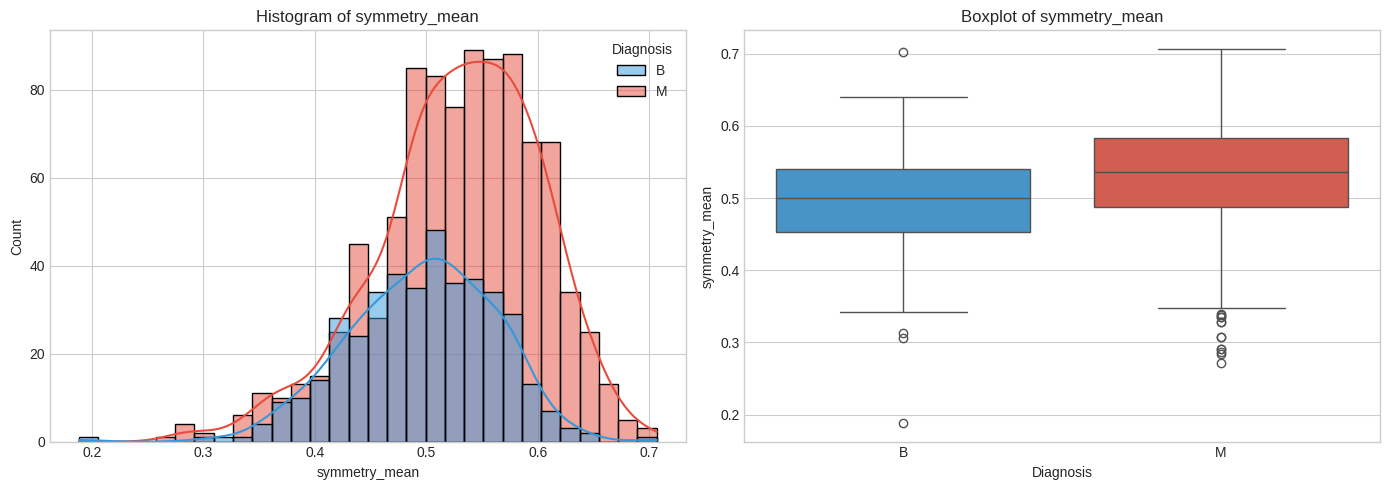

/tmp/ipykernel_541445/1111749914.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train_features, x='Diagnosis', y=col, palette=['#3498db', '#e74c3c'])


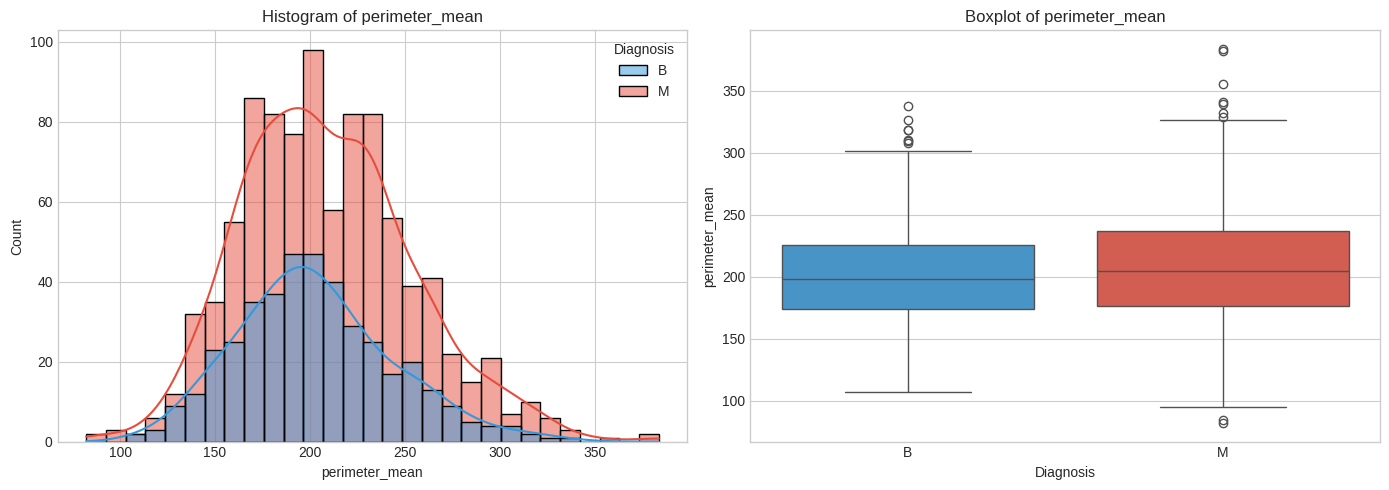

\n### 2.2.3 Feature Correlation Analysis (400X) ###
Correlation heatmap saved to: /home/sih/Documents/GI/l4_s2/decisional_informatics/projects/breast-cancer/reports/figures/400X/feature_correlation_heatmap_400X.png


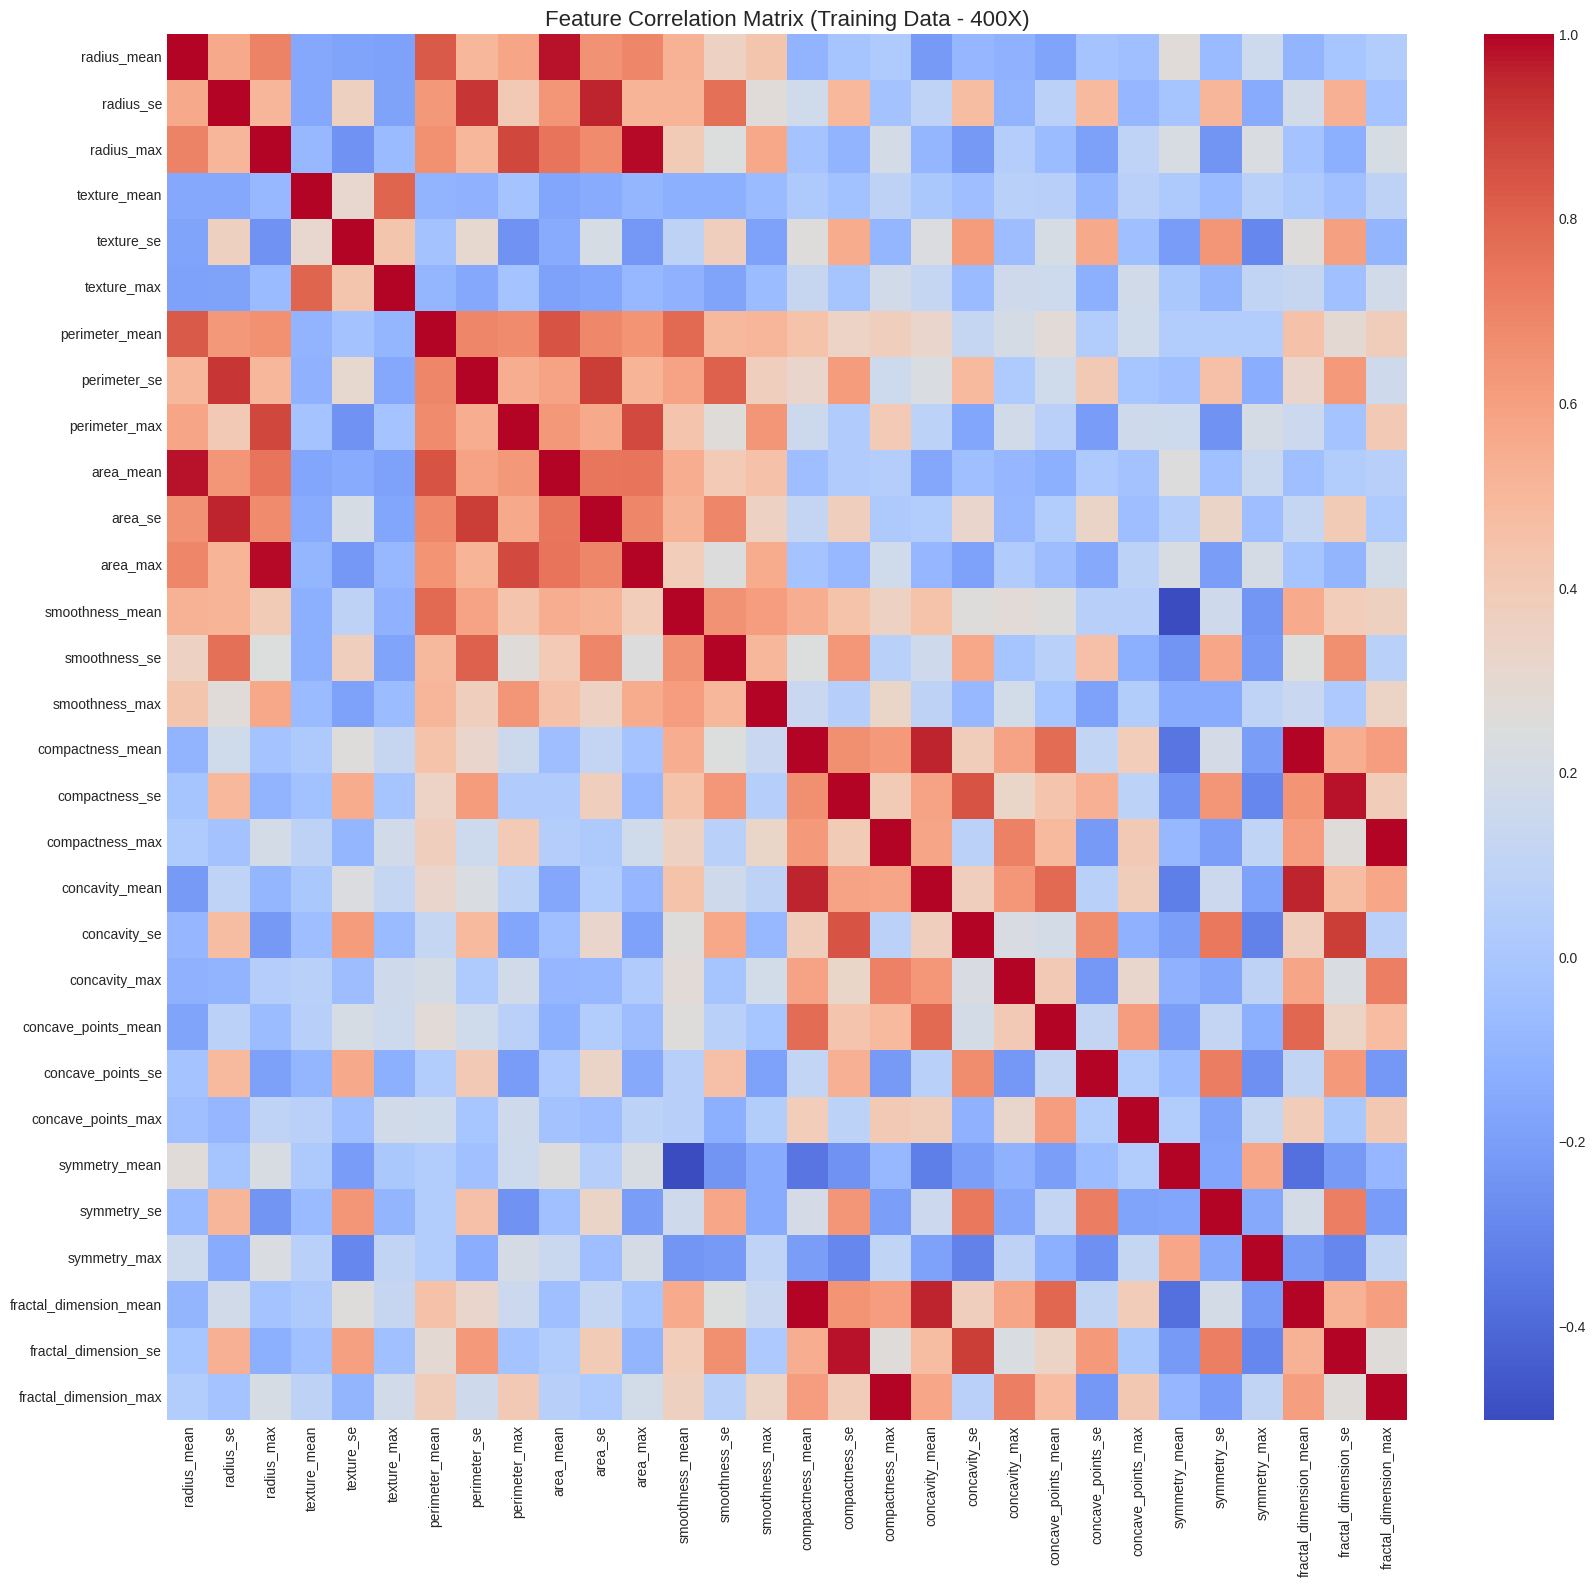

\nHighly Correlated Feature Pairs (abs(correlation) > 0.90):
- fractal_dimension_mean and compactness_mean: 0.997
- fractal_dimension_max and compactness_max: 0.996
- area_max and radius_max: 0.990
- area_mean and radius_mean: 0.981
- fractal_dimension_se and compactness_se: 0.980
- fractal_dimension_mean and concavity_mean: 0.958
- area_se and radius_se: 0.957
- concavity_mean and compactness_mean: 0.953
- perimeter_se and radius_se: 0.922
- fractal_dimension_se and concavity_se: 0.904
- area_se and perimeter_se: 0.901

--- 2.3 Preprocessing Data for 400X ---
Training rows after NaN handling: 1345
Training data preprocessed.
Test rows after NaN handling: 475
Test data preprocessed.

--- 2.4 Training Models for 400X ---
Training SVC...
  Best SVC Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
  Best SVC CV Score: 0.7767
SVC trained and saved.
Training RandomForest...
  Best RandomForest Params: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 2

/home/sih/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:09:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/sih/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:09:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/sih/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:09:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/sih/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:09:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/sih/miniconda3/lib/python3.12/site-packages/xgboost/tr

  Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}
  Best XGBoost CV Score: 0.7856
XGBoost trained and saved.

--- 2.5 Evaluating Models for 400X ---
2025-06-27 17:09:27.815 | INFO     | __main__:evaluate_model:18 - --- Eval: SVC (400X) ---
Accuracy: 0.6589

              precision    recall  f1-score   support

           B       0.54      0.59      0.56       178
           M       0.74      0.70      0.72       297

    accuracy                           0.66       475
   macro avg       0.64      0.65      0.64       475
weighted avg       0.67      0.66      0.66       475


ROC AUC: 0.7116
2025-06-27 17:09:28.481 | INFO     | __main__:evaluate_model:18 - --- Eval: RandomForest (400X) ---
Accuracy: 0.6442

              precision    recall  f1-score   support

           B       0.61      0.14      0.23       178
           M       0.65      0.95      0.77       297

    accuracy                           0.64       475
   macro av

In [11]:
from loguru import logger


# To store performance summaries for final comparison
all_magnification_results = []

# --- Global evaluation_model function (copy from your modeling/predict.py or previous notebook cell) ---
# Ensure it's defined before the loop above, or imported.


def evaluate_model(model_name, model, X_test_data, y_true_encoded, le_encoder, target_magnification, figures_dir, reports_dir):
    # --- Create magnification-specific subdirectories ---
    current_mag_figures_dir = figures_dir / target_magnification
    current_mag_reports_dir = reports_dir / target_magnification
    current_mag_figures_dir.mkdir(parents=True, exist_ok=True)
    current_mag_reports_dir.mkdir(parents=True, exist_ok=True)

    logger.info(f"--- Eval: {model_name} ({target_magnification}) ---")
    if model is None:
        logger.warning(f"{model_name} not loaded.")
        return 0.0, None, None
    if X_test_data.empty or y_true_encoded.size == 0 or np.all(y_true_encoded == -1):
        logger.warning("Test data/labels invalid.")
        return 0.0, None, None
    y_pred, y_prob = None, None
    try:
        y_pred = model.predict(X_test_data)
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test_data)[:, 1]
    except Exception as e:
        logger.error(f"Predict error {model_name}: {e}")
        return 0.0, None, None
    accuracy = accuracy_score(y_true_encoded, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    r_path = reports_dir / \
        f"{model_name.lower().replace(' ', '_')}_{target_magnification}_report.txt"
    cm_path = figures_dir / \
        f"{model_name.lower().replace(' ', '_')}_{target_magnification}_cm.png"
    roc_path = figures_dir / \
        f"{model_name.lower().replace(' ', '_')}_{target_magnification}_roc.png"
    valid_lbls = [l for l in np.unique(
        np.concatenate((y_true_encoded, y_pred))) if l != -1]
    class_rep_str = "No valid labels"
    if valid_lbls:
        tgt_names = le_encoder.inverse_transform(valid_lbls)
        class_rep_str = classification_report(
            y_true_encoded, y_pred, labels=valid_lbls, target_names=tgt_names, zero_division=0)
    print(f"\n{class_rep_str}")
    with open(r_path, 'w') as f:
        f.write(
            f"Report {model_name} ({target_magnification}):\n{class_rep_str}\nAcc: {accuracy:.4f}\n")
    cm_lbls_sk = [l for l in np.unique(
        y_true_encoded) if l != -1] or list(le_encoder.transform(le_encoder.classes_))
    cm = None
    if cm_lbls_sk:
        cm = confusion_matrix(y_true_encoded, y_pred, labels=cm_lbls_sk)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_encoder.inverse_transform(
            cm_lbls_sk), yticklabels=le_encoder.inverse_transform(cm_lbls_sk))
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'CM - {model_name} ({target_magnification})')
        plt.savefig(cm_path)
        plt.close()
        plt.show()
    roc_auc = None
    valid_y_roc = y_true_encoded[y_true_encoded != -1]
    if y_prob is not None and len(np.unique(valid_y_roc)) > 1:
        y_prob_f = y_prob[y_true_encoded != -
                          1] if len(y_prob) == len(y_true_encoded) else y_prob
        fpr, tpr, _ = roc_curve(valid_y_roc, y_prob_f)
        roc_auc = auc(fpr, tpr)
        print(f"\nROC AUC: {roc_auc:.4f}")
        plt.figure(figsize=(7, 5))
        plt.plot(fpr, tpr, color='darkorange', lw=2,
                 label=f'ROC (area={roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0, 1])
        plt.ylim([0, 1.05])
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.title(f'ROC - {model_name} ({target_magnification})')
        plt.legend(loc='lower right')
        plt.savefig(roc_path)
        plt.close()
        plt.show()
        with open(r_path, 'a') as f:
            f.write(f"ROC AUC: {roc_auc:.4f}\n")
    return accuracy, cm, roc_auc


for TARGET_MAGNIFICATION in MAGNIFICATIONS_TO_PROCESS:
    print(f"\n{'='*30} PROCESSING MAGNIFICATION: {TARGET_MAGNIFICATION} {'='*30}\n")

    # --- 2.1 Load Features for Current Magnification ---
    print(f"--- 2.1 Loading Features for {TARGET_MAGNIFICATION} ---")
    train_features_path = PROCESSED_DATA_DIR / \
        f"train_features_{TARGET_MAGNIFICATION}.csv"
    test_features_path = PROCESSED_DATA_DIR / \
        f"test_features_{TARGET_MAGNIFICATION}.csv"

    if not train_features_path.exists() or not test_features_path.exists():
        print(
            f"Feature files for {TARGET_MAGNIFICATION} not found. Skipping this magnification.")
        print(f"Expected train: {train_features_path}")
        print(f"Expected test: {test_features_path}")
        continue

    df_train_features = pd.read_csv(train_features_path)
    df_test_features = pd.read_csv(test_features_path)
    print(
        f"Loaded training features for {TARGET_MAGNIFICATION}. Shape: {df_train_features.shape}")
    print(
        f"Loaded testing features for {TARGET_MAGNIFICATION}. Shape: {df_test_features.shape}")

    # --- 2.2 Exploratory Data Analysis (EDA) on Training Features ---
    # In Notebook 2, inside the loop: `for TARGET_MAGNIFICATION in MAGNIFICATIONS_TO_PROCESS:`

    # --- 2.2 Exploratory Data Analysis (EDA) on Training Features ---
    print(f"\\n--- 2.2 EDA for {TARGET_MAGNIFICATION} Training Features ---")
    if not df_train_features.empty:
        # --- EDA Step 1: Basic Inspection ---
        print("\\n### 2.2.1 Basic Feature Inspection ###")
        print(f"Shape: {df_train_features.shape}")
        print("\\nMissing Values (Before Imputation):")
        missing_values_train = df_train_features[FEATURE_COLUMNS].isnull().sum()
        missing_values_train_plot = missing_values_train[missing_values_train > 0]
        if not missing_values_train_plot.empty:
            print(missing_values_train_plot.sort_values(ascending=False))
        else: 
            print("No missing values in feature columns.")

        print("\\nClass Distribution in Training Data:")
        if 'Diagnosis' in df_train_features.columns:
            print(df_train_features['Diagnosis'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')
            plt.figure(figsize=(6, 4))
            sns.countplot(x='Diagnosis', data=df_train_features, palette=['#3498db', '#e74c3c'])
            plt.title(f"Class Distribution - Train ({TARGET_MAGNIFICATION})")
            plt.show()

        # --- EDA Step 2: Univariate Analysis ---
        print(f"\\n### 2.2.2 Univariate Feature Distributions ({TARGET_MAGNIFICATION}) ###")
        # Plotting a subset to keep the notebook clean, but providing insights for the paper.
        eda_feature_subset = ['radius_mean', 'texture_max', 'concavity_mean', 'area_max', 'symmetry_mean', 'perimeter_mean']
        for col in eda_feature_subset:
            if col in df_train_features.columns:
                plt.figure(figsize=(14, 5))
                plt.subplot(1, 2, 1)
                sns.histplot(data=df_train_features, x=col, hue='Diagnosis', kde=True, multiple="layer", palette=['#3498db', '#e74c3c'])
                plt.title(f'Histogram of {col}')
                plt.subplot(1, 2, 2)
                sns.boxplot(data=df_train_features, x='Diagnosis', y=col, palette=['#3498db', '#e74c3c'])
                plt.title(f'Boxplot of {col}')
                plt.tight_layout()
                plt.show()

        # --- EDA Step 3: Bivariate Analysis (Correlation) ---
        print(f"\\n### 2.2.3 Feature Correlation Analysis ({TARGET_MAGNIFICATION}) ###")
        correlation_matrix_train = df_train_features[FEATURE_COLUMNS].corr()
        
        # Generate and display the heatmap
        plt.figure(figsize=(20, 18))
        sns.heatmap(correlation_matrix_train, annot=False, cmap='coolwarm', fmt=".2f") # annot=False makes it readable
        plt.title(f'Feature Correlation Matrix (Training Data - {TARGET_MAGNIFICATION})', fontsize=16)
        
        # Save the figure
        heatmap_fig_path = FIGURES_DIR / TARGET_MAGNIFICATION / f"feature_correlation_heatmap_{TARGET_MAGNIFICATION}.png"
        plt.savefig(heatmap_fig_path, dpi=300, bbox_inches='tight')
        print(f"Correlation heatmap saved to: {heatmap_fig_path}")
        plt.show()

        # Programmatically find and list highly correlated pairs to make sense of the heatmap
        upper_tri = correlation_matrix_train.where(np.triu(np.ones(correlation_matrix_train.shape), k=1).astype(bool))
        highly_correlated_pairs = []
        for column in upper_tri.columns:
            # Find all correlations in the column greater than the threshold
            strong_corrs = upper_tri[column][abs(upper_tri[column]) > 0.9]
            for idx, value in strong_corrs.items():
                highly_correlated_pairs.append((column, idx, value))

        if highly_correlated_pairs:
            print("\\nHighly Correlated Feature Pairs (abs(correlation) > 0.90):")
            # Use a set to get unique pairs (since (A,B) and (B,A) might both be found if not careful)
            # The upper_tri logic already prevents this, but a set is safer.
            # Sorting for consistent output
            sorted_pairs = sorted(list(set(highly_correlated_pairs)), key=lambda x: abs(x[2]), reverse=True)
            for pair in sorted_pairs:
                print(f"- {pair[0]} and {pair[1]}: {pair[2]:.3f}")
        else:
            print("No feature pairs with absolute correlation > 0.90 found.")

    else:
        print(f"Skipping EDA for {TARGET_MAGNIFICATION} as df_train_features is empty.")

    # --- 2.3 Data Preprocessing ---
    print(f"\n--- 2.3 Preprocessing Data for {TARGET_MAGNIFICATION} ---")
    scaler = StandardScaler()
    le = LabelEncoder()
    imputer = SimpleImputer(strategy='mean')

    X_train_scaled_df, y_train_encoded = pd.DataFrame(), np.array([])
    X_test_scaled_df, y_test_encoded = pd.DataFrame(), np.array([])

    # Preprocess Training Data
    if not df_train_features.empty:
        df_train_clean = df_train_features.copy()
        nan_train_count = df_train_clean[FEATURE_COLUMNS].isnull().any(
            axis=1).sum()
        if nan_train_count > 0:
            if NAN_HANDLING_STRATEGY == 'impute_mean':
                df_train_clean.loc[:, FEATURE_COLUMNS] = imputer.fit_transform(
                    df_train_clean[FEATURE_COLUMNS])
            elif NAN_HANDLING_STRATEGY == 'drop':
                df_train_clean.dropna(subset=FEATURE_COLUMNS, inplace=True)
        print(f"Training rows after NaN handling: {df_train_clean.shape[0]}")
        if not df_train_clean.empty:
            X_train = df_train_clean[FEATURE_COLUMNS]
            y_train_encoded = le.fit_transform(df_train_clean['Diagnosis'])
            X_train_scaled_np = scaler.fit_transform(X_train)
            X_train_scaled_df = pd.DataFrame(
                X_train_scaled_np, columns=FEATURE_COLUMNS, index=X_train.index)
            print("Training data preprocessed.")
        else:
            print(f"Training data empty after NaN for {TARGET_MAGNIFICATION}.")
    else:
        print(f"Initial training features empty for {TARGET_MAGNIFICATION}.")

    # Preprocess Test Data
    if not df_test_features.empty and not X_train_scaled_df.empty:
        df_test_clean = df_test_features.copy()
        nan_test_count = df_test_clean[FEATURE_COLUMNS].isnull().any(
            axis=1).sum()
        if nan_test_count > 0:
            if NAN_HANDLING_STRATEGY == 'impute_mean':
                df_test_clean.loc[:, FEATURE_COLUMNS] = imputer.transform(
                    df_test_clean[FEATURE_COLUMNS])
            elif NAN_HANDLING_STRATEGY == 'drop':
                df_test_clean.dropna(subset=FEATURE_COLUMNS, inplace=True)
        print(f"Test rows after NaN handling: {df_test_clean.shape[0]}")
        if not df_test_clean.empty:
            X_test = df_test_clean[FEATURE_COLUMNS]
            try:
                y_test_encoded = le.transform(df_test_clean['Diagnosis'])
            except ValueError:
                y_test_encoded = np.array([-1]*len(df_test_clean['Diagnosis']))
            X_test_scaled_np = scaler.transform(X_test)
            X_test_scaled_df = pd.DataFrame(
                X_test_scaled_np, columns=FEATURE_COLUMNS, index=X_test.index)
            print("Test data preprocessed.")
        else:
            print(f"Test data empty after NaN for {TARGET_MAGNIFICATION}.")
    else:
        print(
            f"Initial test features empty or train preprocessing failed for {TARGET_MAGNIFICATION}.")

    # Save transformers for this magnification
    current_models_dir = MODELS_DIR / TARGET_MAGNIFICATION
    current_models_dir.mkdir(parents=True, exist_ok=True)
    if 'fit' in dir(imputer) and hasattr(imputer, 'statistics_'):
        joblib.dump(imputer, current_models_dir /
                    f"imputer_{TARGET_MAGNIFICATION}.joblib")
    if hasattr(le, 'classes_'):
        joblib.dump(le, current_models_dir /
                    f"label_encoder_{TARGET_MAGNIFICATION}.joblib")
    if hasattr(scaler, 'mean_'):
        joblib.dump(scaler, current_models_dir /
                    f"scaler_{TARGET_MAGNIFICATION}.joblib")

    # --- 2.4 Model Training ---
    print(f"\n--- 2.4 Training Models for {TARGET_MAGNIFICATION} ---")
    models_trained_current_mag = {}
    if not X_train_scaled_df.empty and y_train_encoded.size > 0:
        # # Define models and param grids (SVC example)
        # svc_param_grid_nb = {'C': [1, 10, 50], 'gamma': [
        #     'scale', 0.01], 'kernel': ['rbf', 'linear']}
        # base_svc_nb = SVC(
        #     probability=True, random_state=DEFAULT_RANDOM_STATE, class_weight='balanced')
        # cv_strat_nb = StratifiedKFold(
        #     n_splits=3, shuffle=True, random_state=DEFAULT_RANDOM_STATE)

        # model_specs = {
        #     "SVC": (GridSearchCV(base_svc_nb, svc_param_grid_nb, cv=cv_strat_nb, scoring='f1_weighted', verbose=0, n_jobs=-1)),
        #     "RandomForest": RandomForestClassifier(n_estimators=100, random_state=DEFAULT_RANDOM_STATE, class_weight='balanced_subsample'),
        #     "LogisticRegression": LogisticRegression(solver='liblinear', random_state=DEFAULT_RANDOM_STATE, class_weight='none', max_iter=200),
        #     "MLP": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=DEFAULT_RANDOM_STATE, early_stopping=True, n_iter_no_change=10),
        #     "XGBoost": xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', use_label_encoder=False, random_state=DEFAULT_RANDOM_STATE, scale_pos_weight=70 / 30)
        # }

        # Replace with your actual random state
        DEFAULT_RANDOM_STATE = 42

        # Stratified K-Fold
        cv_strat_nb = StratifiedKFold(
            n_splits=3, shuffle=True, random_state=DEFAULT_RANDOM_STATE)

        # -------------------------------
        # 🔹 SVC
        svc_param_grid = {
            'C': [1, 10, 50],
            'gamma': ['scale', 0.01],
            'kernel': ['rbf', 'linear']
        }
        svc_model = GridSearchCV(
            SVC(probability=True, random_state=DEFAULT_RANDOM_STATE,
                class_weight='balanced'),
            svc_param_grid,
            cv=cv_strat_nb,
            scoring='roc_auc',
            n_jobs=-1
        )

        # -------------------------------
        # 🔹 Random Forest
        rf_param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'class_weight': ['balanced', 'balanced_subsample']
        }
        rf_model = GridSearchCV(
            RandomForestClassifier(random_state=DEFAULT_RANDOM_STATE),
            rf_param_grid,
            cv=cv_strat_nb,
            scoring='roc_auc',
            n_jobs=-1
        )

        # -------------------------------
        # 🔹 Logistic Regression
        lr_param_grid = {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'class_weight': ['balanced']
        }
        lr_model = GridSearchCV(
            LogisticRegression(
                solver='liblinear', random_state=DEFAULT_RANDOM_STATE, max_iter=200),
            lr_param_grid,
            cv=cv_strat_nb,
            scoring='roc_auc',
            n_jobs=-1
        )

        # -------------------------------
        # 🔹 MLP Classifier
        mlp_param_grid = {
            'hidden_layer_sizes': [(100,), (100, 50)],
            'alpha': [0.0001, 0.001],
            'learning_rate_init': [0.001, 0.01]
        }
        mlp_model = GridSearchCV(
            MLPClassifier(max_iter=500, early_stopping=True,
                          random_state=DEFAULT_RANDOM_STATE),
            mlp_param_grid,
            cv=cv_strat_nb,
            scoring='roc_auc',
            n_jobs=-1
        )

        # -------------------------------
        # 🔹 XGBoost
        xgb_param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [3, 6],
            'learning_rate': [0.01, 0.1],
            'subsample': [0.8, 1.0]
        }
        xgb_model = GridSearchCV(
            xgb.XGBClassifier(
                objective='binary:logistic',
                eval_metric='auc',
                use_label_encoder=False,
                random_state=DEFAULT_RANDOM_STATE,
                scale_pos_weight=70 / 30
            ),
            xgb_param_grid,
            cv=cv_strat_nb,
            scoring='roc_auc',
            n_jobs=-1
        )

        # -------------------------------
        # Final Model Specs Dictionary
        model_specs = {
            "SVC": svc_model,
            "RandomForest": rf_model,
            "LogisticRegression": lr_model,
            "MLP": mlp_model,
            "XGBoost": xgb_model
        }

        for name, model_obj in model_specs.items():
            print(f"Training {name}...")
            try:
                model_obj.fit(X_train_scaled_df, y_train_encoded)
                if isinstance(model_obj, GridSearchCV):
                    print(f"  Best {name} Params: {model_obj.best_params_}")
                    print(
                        f"  Best {name} CV Score: {model_obj.best_score_:.4f}")
                    models_trained_current_mag[name] = model_obj.best_estimator_
                else:
                    models_trained_current_mag[name] = model_obj
                joblib.dump(models_trained_current_mag[name], current_models_dir /
                            f"{name.lower()}_model_{TARGET_MAGNIFICATION}.joblib")
                print(f"{name} trained and saved.")
            except Exception as e:
                print(f"Error training {name}: {e}")
    else:
        print(
            f"Skipping training for {TARGET_MAGNIFICATION} due to lack of processed training data.")

    # --- 2.5 Model Evaluation ---
    print(f"\n--- 2.5 Evaluating Models for {TARGET_MAGNIFICATION} ---")
    current_mag_performance = []
    if not X_test_scaled_df.empty and y_test_encoded.size > 0 and np.any(y_test_encoded != -1):
        for model_name, model_instance in models_trained_current_mag.items():
            figures_dir_mag = FIGURES_DIR / TARGET_MAGNIFICATION
            reports_dir_mag = REPORTS_DIR / TARGET_MAGNIFICATION
            acc, _, roc = evaluate_model(model_name, model_instance, X_test_scaled_df, y_test_encoded,
                                         # Pass correct figs/reports dir
                                         le, TARGET_MAGNIFICATION, figures_dir_mag, reports_dir_mag)
            current_mag_performance.append(
                {'Magnification': TARGET_MAGNIFICATION, 'Model': model_name, 'Accuracy': acc, 'ROC_AUC': roc})
    else:
        print(
            f"Skipping evaluation for {TARGET_MAGNIFICATION}: Test data/labels empty or invalid.")

    if current_mag_performance:
        all_magnification_results.extend(current_mag_performance)
        df_current_perf = pd.DataFrame(current_mag_performance)
        print(f"\nPerformance Summary for {TARGET_MAGNIFICATION}:")
        print(df_current_perf.to_string(index=False))
    print(f"\n{'='*30} COMPLETED PROCESSING FOR MAGNIFICATION: {TARGET_MAGNIFICATION} {'='*30}\n")

## 3. Comparative Analysis Across Magnifications

After processing all specified magnifications, we can now compare their performance.



--- Overall Model Performance Summary Across Magnifications ---
Magnification              Model  Accuracy  ROC_AUC
         100X            XGBoost  0.685315 0.627560
         100X       RandomForest  0.683566 0.595641
         100X                SVC  0.639860 0.621455
         100X                MLP  0.610140 0.599201
         100X LogisticRegression  0.601399 0.593462
         200X            XGBoost  0.640684 0.528858
         200X                MLP  0.638783 0.593564
         200X       RandomForest  0.633080 0.540797
         200X LogisticRegression  0.593156 0.618580
         200X                SVC  0.579848 0.571355
         400X            XGBoost  0.698947 0.718534
         400X                SVC  0.658947 0.711648
         400X                MLP  0.656842 0.642606
         400X       RandomForest  0.644211 0.697547
         400X LogisticRegression  0.642105 0.690065
          40X                MLP  0.648393 0.611905
          40X            XGBoost  0.644612 0.58566

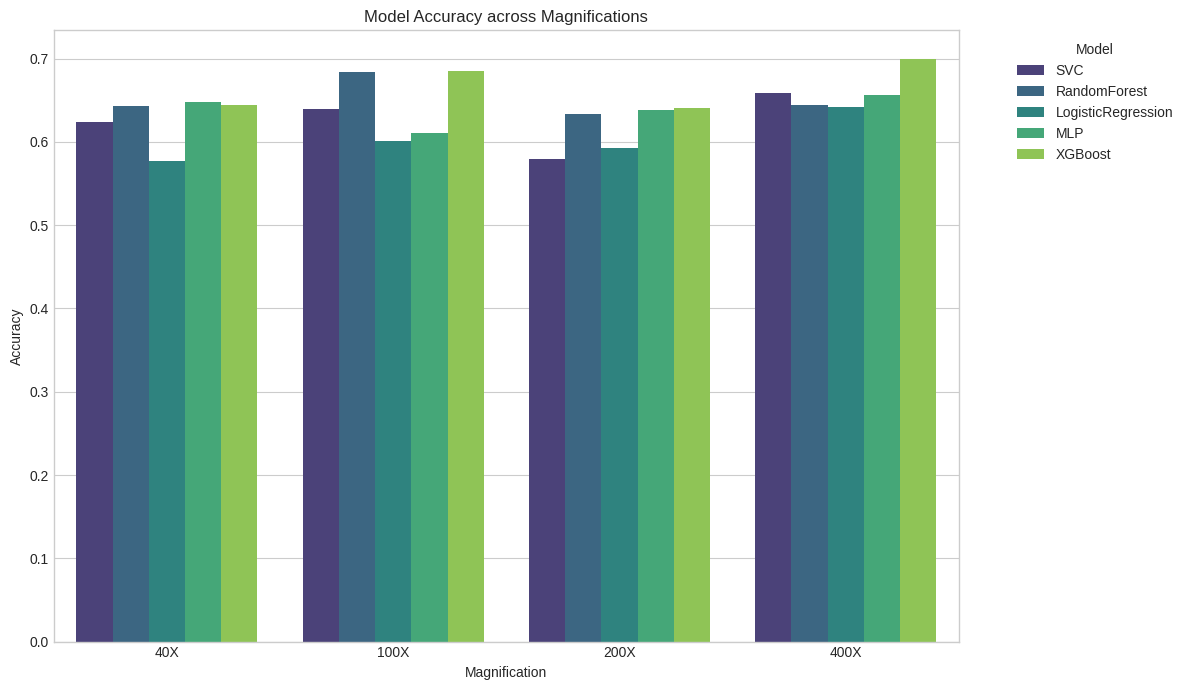

ROC AUC comparison plot saved to /home/sih/Documents/GI/l4_s2/decisional_informatics/projects/breast-cancer/reports/figures/roc_auc_by_magnification_comparison.png


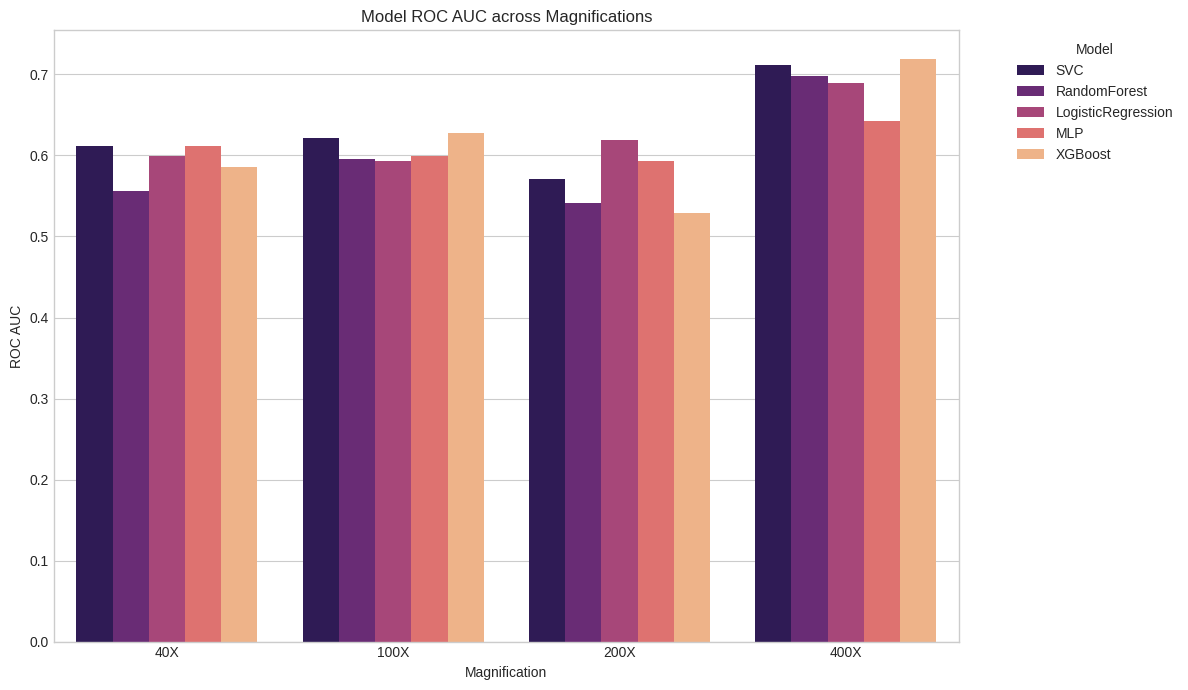

In [12]:
if all_magnification_results:
    df_all_perf = pd.DataFrame(all_magnification_results)
    print("\n\n--- Overall Model Performance Summary Across Magnifications ---")
    print(df_all_perf.sort_values(by=['Magnification', 'Accuracy'], ascending=[True, False]).to_string(index=False))
    
    # Save this combined summary
    combined_summary_path = REPORTS_DIR / "model_performance_summary_ALL_MAGNIFICATIONS.csv"
    df_all_perf.to_csv(combined_summary_path, index=False)
    print(f"\nCombined performance summary saved to {combined_summary_path}")

    # Example: Plotting Accuracy vs. Magnification for each model
    plt.figure(figsize=(12, 7))
    sns.barplot(data=df_all_perf, x='Magnification', y='Accuracy', hue='Model', palette='viridis')
    plt.title('Model Accuracy across Magnifications')
    plt.ylabel('Accuracy')
    plt.xlabel('Magnification')
    plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    acc_plot_path = FIGURES_DIR / "accuracy_by_magnification_comparison.png"
    plt.savefig(acc_plot_path)
    print(f"Accuracy comparison plot saved to {acc_plot_path}")
    plt.show()

    plt.figure(figsize=(12, 7))
    sns.barplot(data=df_all_perf, x='Magnification', y='ROC_AUC', hue='Model', palette='magma')
    plt.title('Model ROC AUC across Magnifications')
    plt.ylabel('ROC AUC')
    plt.xlabel('Magnification')
    plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    roc_plot_path = FIGURES_DIR / "roc_auc_by_magnification_comparison.png"
    plt.savefig(roc_plot_path)
    print(f"ROC AUC comparison plot saved to {roc_plot_path}")
    plt.show()
else:
    print("\nNo results to summarize across magnifications. Ensure previous steps ran for at least one magnification.")

\n--- Parsing Full Classification Reports for Detailed Comparison ---
Skipping detailed metrics for 40X: Transformer files not found.
Skipping detailed metrics for 100X: Transformer files not found.
Skipping detailed metrics for 400X: Transformer files not found.

--- Generating Benign Recall Comparison Plot ---
Benign Recall comparison plot saved to /home/sih/Documents/GI/l4_s2/decisional_informatics/projects/breast-cancer/reports/figures/benign_recall_by_magnification_comparison.png


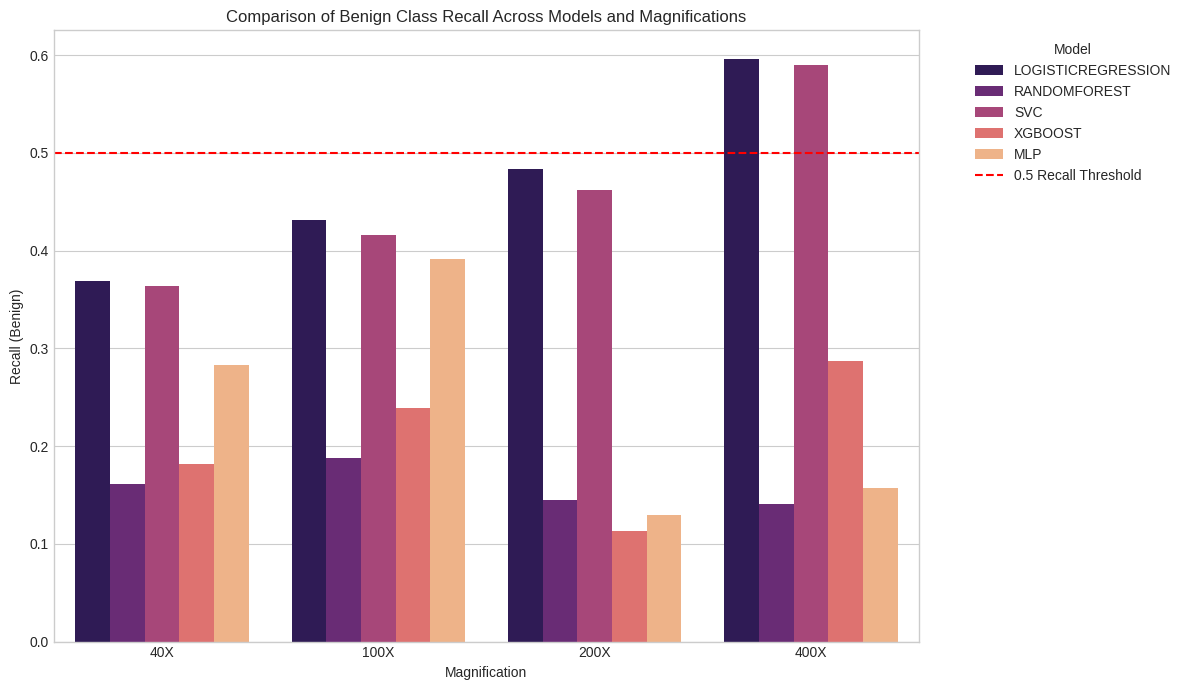

In [14]:
print("\\n--- Parsing Full Classification Reports for Detailed Comparison ---")

# We will re-calculate the metrics from the saved models and data to be precise
# This is more robust than parsing text files.

detailed_results = []

for TARGET_MAGNIFICATION in MAGNIFICATIONS_TO_PROCESS:
    # Load the necessary files for this magnification
    models_dir_mag = MODELS_DIR / TARGET_MAGNIFICATION
    test_features_path = PROCESSED_DATA_DIR / f"test_features_{TARGET_MAGNIFICATION}.csv"
    
    if not test_features_path.exists():
        print(f"Skipping detailed metrics for {TARGET_MAGNIFICATION}: test features not found.")
        continue

    # --- Preprocess test data again for this analysis ---
    df_test_features = pd.read_csv(test_features_path)
    if df_test_features.empty: continue

    try:
        scaler = joblib.load(models_dir_mag / f"scaler_{TARGET_MAGNIFICATION}.joblib")
        le = joblib.load(models_dir_mag / f"label_encoder_{TARGET_MAGNIFICATION}.joblib")
        try:
            imputer = joblib.load(models_dir_mag / f"imputer_{TARGET_MAGNIFICATION}.joblib") if NAN_HANDLING_STRATEGY == 'impute_mean' else None
        except FileNotFoundError:
            print(f"Skipping detailed metrics for {TARGET_MAGNIFICATION}: Transformer files not found.")
            impute = None
            # continue
    except FileNotFoundError:
        print(f"Skipping detailed metrics for {TARGET_MAGNIFICATION}: Transformer files not found.")
        continue

    df_test_clean = df_test_features.copy()
    if df_test_clean[FEATURE_COLUMNS].isnull().any().any():
        if NAN_HANDLING_STRATEGY == 'impute_mean' and imputer:
            df_test_clean.loc[:, FEATURE_COLUMNS] = imputer.transform(df_test_clean[FEATURE_COLUMNS])
        else: # Drop if impute not chosen or imputer missing
            df_test_clean.dropna(subset=FEATURE_COLUMNS, inplace=True)
    
    if df_test_clean.empty: continue

    X_test = df_test_clean[FEATURE_COLUMNS]
    y_test_raw = df_test_clean['Diagnosis']
    try:
        y_test_encoded = le.transform(y_test_raw)
    except ValueError:
        # Handle unseen labels by setting them to -1, which we will filter out
        y_test_encoded = np.array([le.transform([label])[0] if label in le.classes_ else -1 for label in y_test_raw])
    
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=FEATURE_COLUMNS, index=X_test.index)

    # Get the integer labels for Benign ('B') and Malignant ('M')
    try:
        benign_label_int = le.transform(['B'])[0]
        malignant_label_int = le.transform(['M'])[0]
    except ValueError:
        print(f"Warning: Could not find 'B' or 'M' in LabelEncoder for {TARGET_MAGNIFICATION}")
        continue

    model_files = list(models_dir_mag.glob(f"*_model_{TARGET_MAGNIFICATION}.joblib"))

    for model_path in model_files:
        model_name = model_path.stem.replace(f"_model_{TARGET_MAGNIFICATION}", "").upper()
        model = joblib.load(model_path)
        
        y_pred = model.predict(X_test_scaled)
        
        # Calculate precision, recall, f1 for both classes
        # Use labels=[benign_label_int, malignant_label_int] to ensure consistent output order
        # Filter out any -1 placeholders from y_test_encoded and corresponding y_pred
        valid_indices = y_test_encoded != -1
        y_true_valid = y_test_encoded[valid_indices]
        y_pred_valid = y_pred[valid_indices]
        
        p, r, f, s = precision_recall_fscore_support(
            y_true_valid, y_pred_valid, 
            labels=[benign_label_int, malignant_label_int], 
            zero_division=0
        )
        
        # Get overall accuracy
        acc = accuracy_score(y_true_valid, y_pred_valid)
        
        # Append detailed results
        detailed_results.append({
            'Magnification': TARGET_MAGNIFICATION,
            'Model': model_name,
            'Accuracy': acc,
            'Benign_Recall': r[0],  # Recall for label at index 0 (Benign)
            'Malignant_Recall': r[1], # Recall for label at index 1 (Malignant)
            'Benign_F1': f[0],
            'Malignant_F1': f[1]
        })

# --- Create the Benign Recall Comparison Plot ---
if detailed_results:
    df_detailed_perf = pd.DataFrame(detailed_results)
    
    print("\n--- Generating Benign Recall Comparison Plot ---")
    
    plt.figure(figsize=(12, 7))
    sns.barplot(data=df_detailed_perf, x='Magnification', y='Benign_Recall', hue='Model', palette='magma')
    plt.title('Comparison of Benign Class Recall Across Models and Magnifications')
    plt.ylabel('Recall (Benign)')
    plt.xlabel('Magnification')
    plt.axhline(y=0.5, color='r', linestyle='--', label='0.5 Recall Threshold')
    plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save the figure
    benign_recall_plot_path = FIGURES_DIR / "benign_recall_by_magnification_comparison.png"
    plt.savefig(benign_recall_plot_path, dpi=300)
    print(f"Benign Recall comparison plot saved to {benign_recall_plot_path}")
    
    plt.show()
else:
    print("\nNo detailed results were generated, cannot create comparison plot.")